# Mobile Price Classification

## Exploratory Data Analysis for mobile price classification (price range group vs features)

In [2]:
#Import Statements
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt #visualisation

In [3]:
# Retrieve the train and test datasets
train_data = pd.read_csv(r"..\data\MobilePriceClassification\train.csv")
test_data = pd.read_csv(r"..\data\MobilePriceClassification\test.csv")

### Check the number of missing rows for taget column (price range)

In [4]:
#Total no. of records in train_data
print("No. of rows in train dataset:",len(train_data))
print("No. of missing rows in purpose column", train_data["price_range"].isna().sum())

#Total no. of records in the test_data
print("No. of rows in the test dataset:", len(test_data))

No. of rows in train dataset: 1500
No. of missing rows in purpose column 0
No. of rows in the test dataset: 500


### There are no missing rows for the target column in the train dataset.

### Continue to perform EDA on dataframes

In [5]:
#Investigate the train dataframe
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1500 non-null   int64  
 1   battery_power  1500 non-null   int64  
 2   blue           1500 non-null   int64  
 3   clock_speed    1500 non-null   float64
 4   dual_sim       1500 non-null   int64  
 5   fc             1500 non-null   int64  
 6   four_g         1500 non-null   int64  
 7   int_memory     1500 non-null   int64  
 8   m_dep          1500 non-null   float64
 9   mobile_wt      1500 non-null   int64  
 10  n_cores        1500 non-null   int64  
 11  pc             1500 non-null   int64  
 12  px_height      1500 non-null   int64  
 13  px_width       1500 non-null   int64  
 14  ram            1500 non-null   int64  
 15  sc_h           1500 non-null   int64  
 16  sc_w           1500 non-null   int64  
 17  talk_time      1500 non-null   int64  
 18  three_g 

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,227,1151,1,2.9,1,0,0,31,0.6,128,...,1022,1560,2377,18,8,13,0,1,0,2
1,1829,1065,0,1.7,1,4,1,48,0.3,162,...,1188,1948,265,8,0,12,1,0,0,0
2,1497,1375,0,2.9,0,2,0,20,0.4,147,...,596,679,3847,8,0,12,1,0,1,3
3,297,1329,1,1.0,0,1,0,52,0.9,181,...,1053,1458,1228,8,6,6,1,0,1,1
4,1685,1521,1,1.6,0,5,1,62,0.3,143,...,678,1630,3555,5,2,19,1,0,0,3


### It can be seen from above that there are no object dtype (string datatype) categories as all of the columns are either int or float datatypes. There are no missing values in the dataset as well. Will perform another check again just to be thorough

### Peek into the columns of the test dataframe as well as the first 5 rows of the test dataframe

In [6]:
#Investigate the train dataframe
print(test_data.info())
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   battery_power  500 non-null    int64  
 2   blue           500 non-null    int64  
 3   clock_speed    500 non-null    float64
 4   dual_sim       500 non-null    int64  
 5   fc             500 non-null    int64  
 6   four_g         500 non-null    int64  
 7   int_memory     500 non-null    int64  
 8   m_dep          500 non-null    float64
 9   mobile_wt      500 non-null    int64  
 10  n_cores        500 non-null    int64  
 11  pc             500 non-null    int64  
 12  px_height      500 non-null    int64  
 13  px_width       500 non-null    int64  
 14  ram            500 non-null    int64  
 15  sc_h           500 non-null    int64  
 16  sc_w           500 non-null    int64  
 17  talk_time      500 non-null    int64  
 18  three_g   

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1021,1,0.5,1,0,1,53,0.7,136,...,6,905,1988,2631,17,3,7,1,1,0
1,2,563,1,0.5,1,2,1,41,0.9,145,...,6,1263,1716,2603,11,2,9,1,1,0
2,6,1821,0,1.7,0,4,1,10,0.8,139,...,10,381,1018,3220,13,8,18,1,0,1
3,9,509,1,0.6,1,2,1,9,0.1,93,...,15,1137,1224,513,19,10,12,1,0,0
4,17,595,0,0.9,1,7,1,23,0.1,121,...,17,441,810,3752,10,2,18,1,1,0


### Similar to the train dataframe, there is no missing values in the test dataframe. Will perform another check again just to be thorough

### Start deeper exploratory data analaysis of the train dataframe (to prevent data snooping/leakage) by beginning with summary statistics

In [7]:
train_data.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,227,1151,1,2.9,1,0,0,31,0.6,128,...,1022,1560,2377,18,8,13,0,1,0,2
1,1829,1065,0,1.7,1,4,1,48,0.3,162,...,1188,1948,265,8,0,12,1,0,0,0
2,1497,1375,0,2.9,0,2,0,20,0.4,147,...,596,679,3847,8,0,12,1,0,1,3
3,297,1329,1,1.0,0,1,0,52,0.9,181,...,1053,1458,1228,8,6,6,1,0,1,1
4,1685,1521,1,1.6,0,5,1,62,0.3,143,...,678,1630,3555,5,2,19,1,0,0,3


In [8]:
train_data.describe()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,999.562000,1230.742000,0.508000,1.536867,0.519333,4.361333,0.526667,32.067333,0.500133,140.582667,...,654.626667,1263.805333,2113.516000,12.293333,5.797333,10.860667,0.763333,0.506667,0.510667,1.488000
std,577.074342,440.517687,0.500103,0.810246,0.499793,4.367549,0.499455,18.179598,0.285799,35.535762,...,441.496076,428.900661,1079.558518,4.179346,4.366956,5.506614,0.425178,0.500122,0.500053,1.118342
min,0.000000,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,503.750000,838.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,299.750000,888.750000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1004.000000,1209.000000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,...,585.000000,1262.000000,2102.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1491.250000,1611.750000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,171.000000,...,952.250000,1643.500000,3056.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1999.000000,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1997.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
train_data.iloc[:,8:15].describe()

,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram
count,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,0.500133,140.582667,4.513333,9.87000,654.626667,1263.805333,2113.516000
std,0.285799,35.535762,2.304784,6.09288,441.496076,428.900661,1079.558518
min,0.100000,80.000000,1.000000,0.00000,0.000000,500.000000,256.000000
25%,0.200000,109.000000,3.000000,4.00000,299.750000,888.750000,1210.750000
50%,0.500000,141.000000,4.000000,10.00000,585.000000,1262.000000,2102.500000
75%,0.800000,171.000000,7.000000,15.00000,952.250000,1643.500000,3056.250000
max,1.000000,200.000000,8.000000,20.00000,1960.000000,1997.000000,3998.000000


In [10]:
train_data.nunique()

Unnamed: 0       1500
battery_power     932
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         991
px_width          956
ram              1246
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### From the above results, **Unnamed: 0 column** can be **removed** as it does not seem to be useful in adding predictive power to the machine learning model when it is just an id column. Unique identifiers does not help in predicting the price_range.

#### **Mobile_wt, px_height, and px_width** are continuous variables. The range of Mobile_wt is from 80 - 200, which is perfectly reasonable. However, the range of px_height is from 0 to 1960, while the px_width is from 500 - 1997. **The value of 0 for px_height is odd and requires investigation**

#### **sc_h and sc_w** are discrete variables and seems to represent the aspect ratio of the screen. **It is however odd that sc_w has values of 0 even though sc_h is not a 0**. It is not possible for a screen to have sc_h values > 0 but sc_w as 0.

#### **Ram, battery power, clock speed** are also continuous variables and seems to be within reasonable range without both negative values and 0 values.

#### **Wifi, blue, four_g, dual_sim, three_g and touch screens** are all binary encoded. As such, these do not have to be one-hot encoded and a 0/1 in a column suffices to indicate the presence of the features.

#### **Price_Range (Target Label)** can be observed to have equal distribution of the unique values **(4 unique values)** since for every 25% increase in percentile, the values increases by 1. 

### Brief check on missing values before eda, which will be investigated later should there be missing values in columns.

In [11]:
train_data.isna().sum()

Unnamed: 0       0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### However, there can be the case that **NAs are represented by 0 values**, requiring further investigations later.

## Univariate analysis

### Univariate analysis of target feature (price_range)

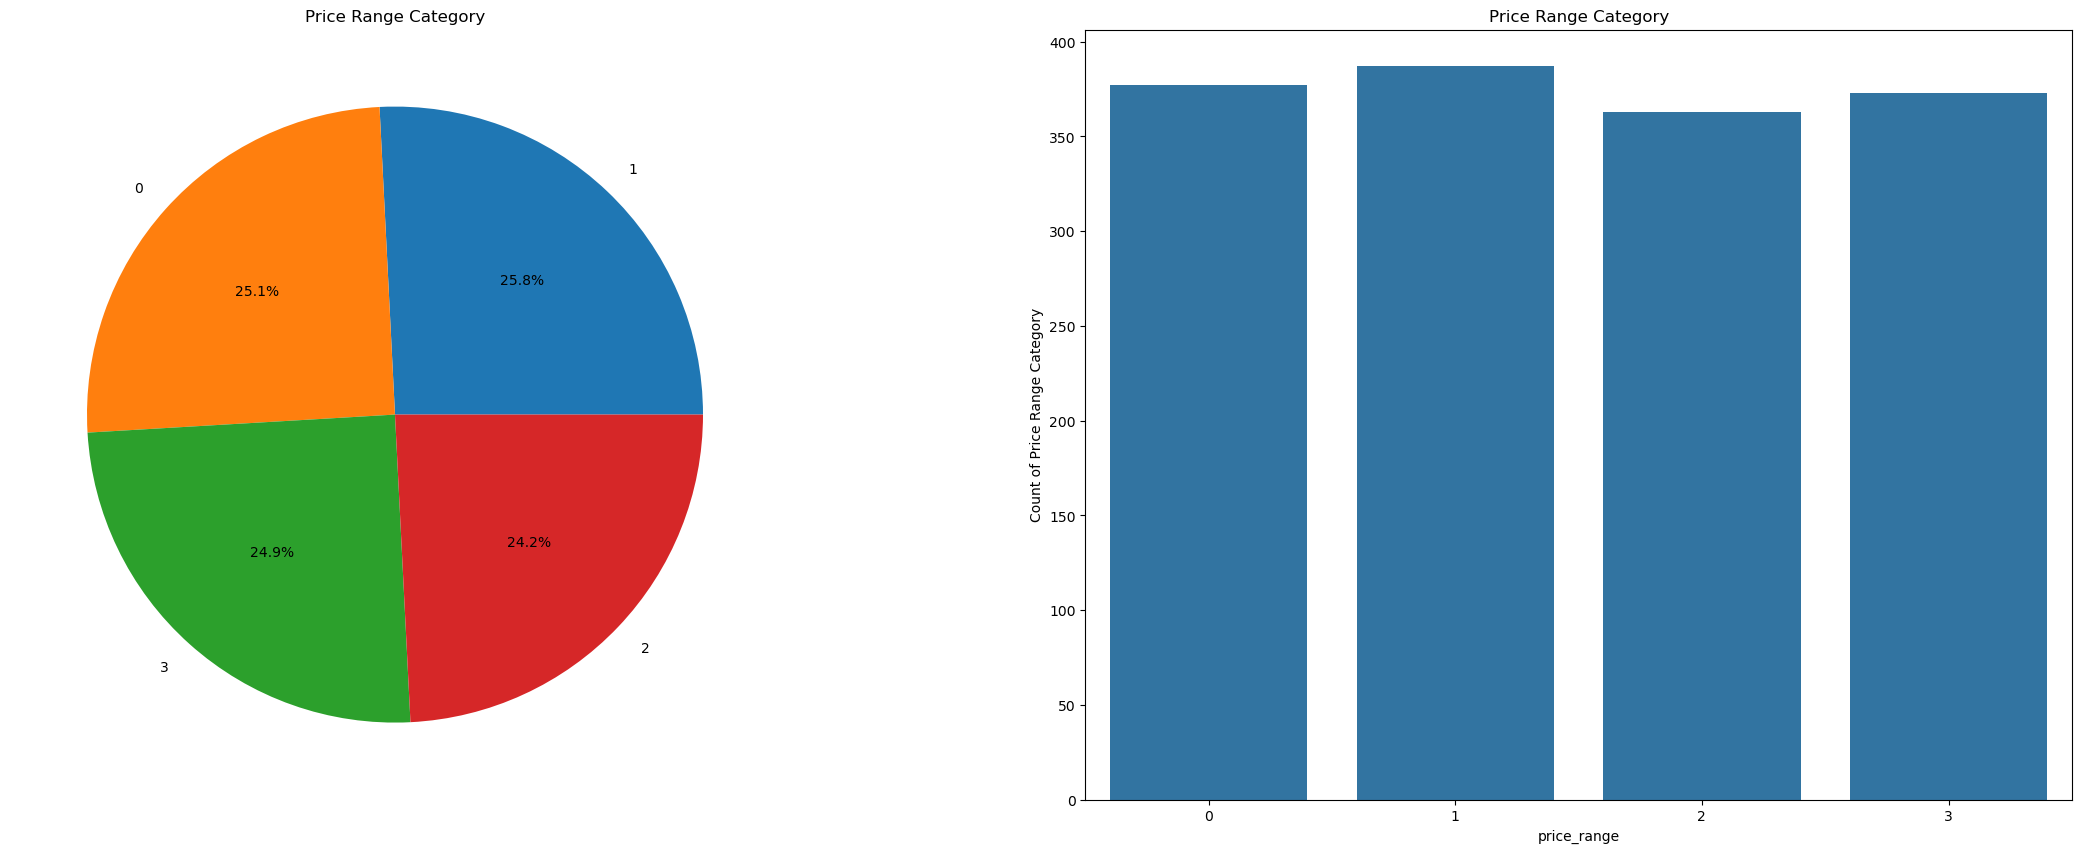

In [12]:
f,ax = plt.subplots(1,2,figsize=(28,10))
train_data["price_range"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax[0])
ax[0].set_title("Price Range Category")
ax[0].set_ylabel("")
sns.countplot(data=train_data,x="price_range",ax=ax[1])
ax[1].set_title("Price Range Category")
ax[1].set_ylabel("Count of Price Range Category")
ax[1].tick_params(axis='x')

### The distributions of the target feature is approximately balanced. As such, accuracy is suitable as an evaluation metric. The figures also mean that the price range of the mobile phones in this train dataset distribution is very well-distributed and not overtly skewed to being pricey or cheap.

### n_cores univariate analysis (discrete variable)

In [86]:
print("The min of n_cores is ", train_data["n_cores"].min())
print("The median of n_cores is ", train_data["n_cores"].median())
print("The max of n_cores is ", train_data["n_cores"].max())

The min of n_cores is  1
The median of n_cores is  4.0
The max of n_cores is  8


<Axes: xlabel='n_cores'>

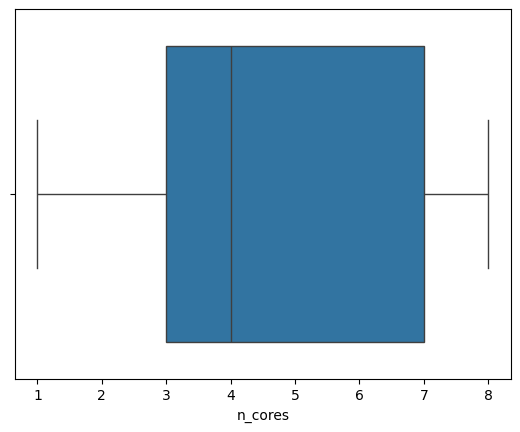

In [87]:
sns.boxplot(x=train_data["n_cores"])

<Axes: xlabel='n_cores', ylabel='Count'>

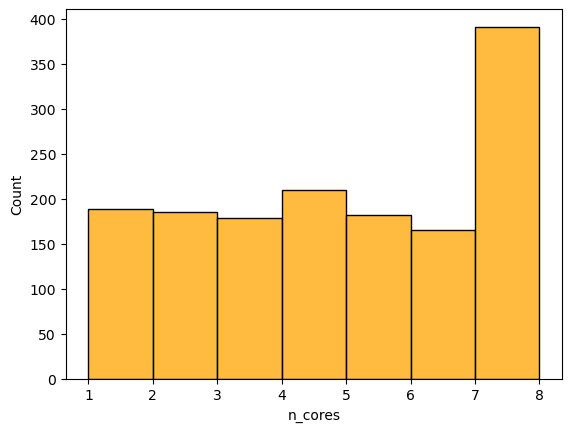

In [89]:
sns.histplot(data=train_data, x="n_cores",color="orange",binwidth=1)

### There are no outliers indicated by the boxplot. Even if there are, only unreasonable values would be of significant concern. Nonetheless, 75% of the values are between 3 and 8 and a large percentage are between 7 - 8 n_cores. 

### int_memory univariate analysis (discrete variable)

In [88]:
print("The min of int_memory is ", train_data["int_memory"].min())
print("The median of int_memory is ", train_data["int_memory"].median())
print("The max of int_memory is ", train_data["int_memory"].max())

The min of int_memory is  2
The median of int_memory is  32.0
The max of int_memory is  64


<Axes: xlabel='int_memory'>

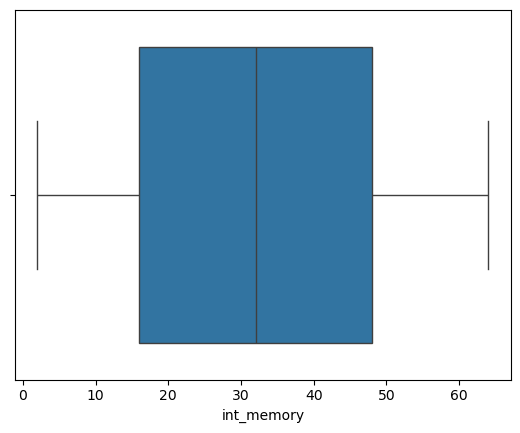

In [90]:
sns.boxplot(x=train_data["int_memory"])

<Axes: xlabel='int_memory', ylabel='Count'>

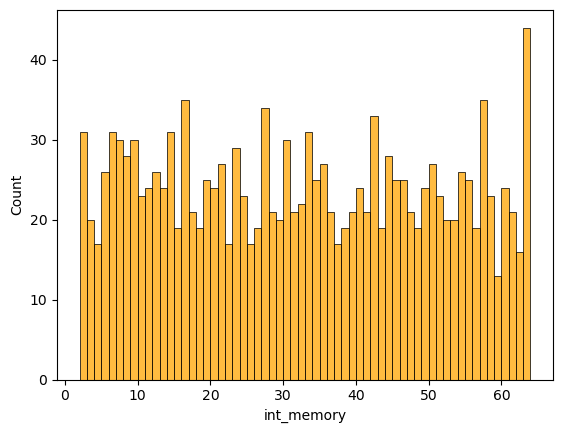

In [91]:
sns.histplot(data=train_data, x="int_memory",color="orange",binwidth=1)

### The values seem reasonable as there is no 0 which would definitely seem odd. There is a somewhat non-linear distribution, but more investigation is needed to check how this relates to the price_range target variables.

### sc_h univariate analysis

In [13]:
print("The min of screen height (sc_h) is ", train_data["sc_h"].min())
print("The min of screen height (sc_h) is ", train_data["sc_h"].median())
print("The min of screen height (sc_h) is ", train_data["sc_h"].max())

The min of screen height (sc_h) is  5
The min of screen height (sc_h) is  12.0
The min of screen height (sc_h) is  19


<Axes: xlabel='sc_h'>

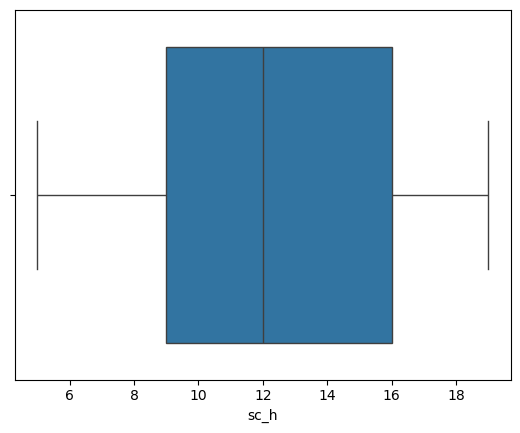

In [14]:
sns.boxplot(x=train_data["sc_h"])

### There are no outliers indicated in the boxplot which means that there are no extreme values for this sc_h column. However, sometimes even though there are outliers, it can still be a valid sample/row unless it is a data measurement error.

<Axes: xlabel='sc_h', ylabel='Count'>

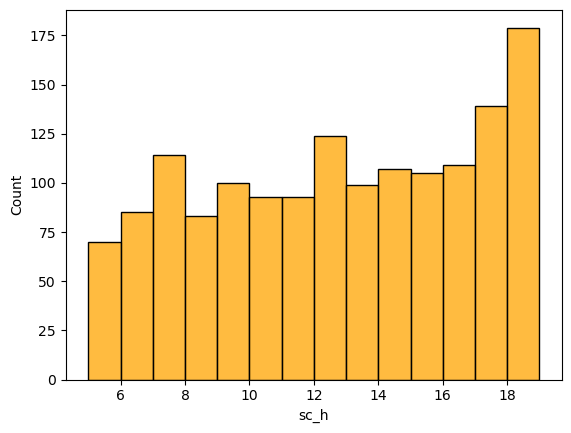

In [15]:
sns.histplot(data=train_data, x="sc_h",color="orange",binwidth=1)

### It can be seen that the sc_h is quite well-distributed with just a peak at the 18-19 values range. No transformation is needed as the additive effects or changes is what should be kept.

### sc_w univariate analysis

In [16]:
print("The min of screen width (sc_w) is ", train_data["sc_w"].min())
print("The min of screen width (sc_w) is ", train_data["sc_w"].median())
print("The min of screen width (sc_w) is ", train_data["sc_w"].max())

The min of screen width (sc_w) is  0
The min of screen width (sc_w) is  5.0
The min of screen width (sc_w) is  18


<Axes: xlabel='sc_w'>

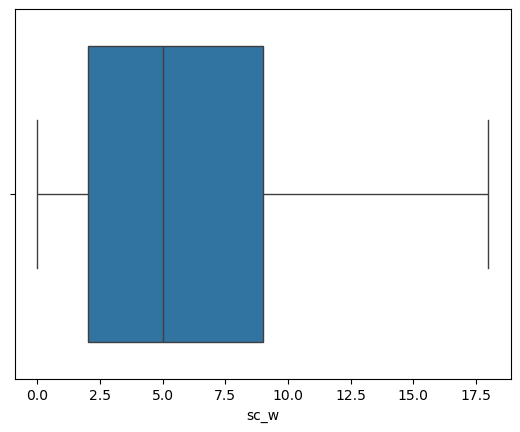

In [17]:
sns.boxplot(x=train_data["sc_w"])

### There are no outliers reported as above

<Axes: xlabel='sc_w', ylabel='Count'>

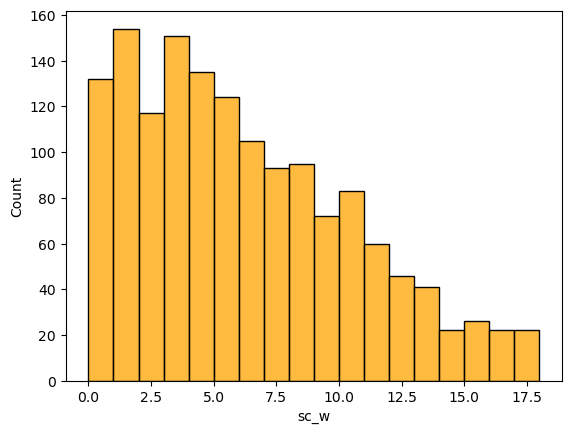

In [18]:
sns.histplot(data=train_data, x="sc_w",color="orange",binwidth=1)

### From the histogram, it can be seen that there is a sizable rows with 0.0 screen width. It will be alarming to have a **screen width of 0.0, whereas the screen height is greater than 0 as such a screen would not exist.** Though it is a skewed distribtuion when compared to the sc_h variable, as the values do not differ by orders of magnitude and we are looking at additive changes instead of relative changes, no transformation is performed. (unless it is greatly different and we are looking at multiplicative changes/relative changes)

### Briefly investigate the sc_w rows

In [19]:
#Print the number of rows px_height equal to 0 and yet having px_width > 0
print("Number of rows with sc_w == 0 :  ",len(train_data[(train_data["sc_w"] == 0)]))
train_data[(train_data["sc_w"] == 0) & (train_data["sc_h"] > 0)]

Number of rows with sc_w == 0 :   132


,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1829,1065,0,1.7,1,4,1,48,0.3,162,...,1188,1948,265,8,0,12,1,0,0,0
2,1497,1375,0,2.9,0,2,0,20,0.4,147,...,596,679,3847,8,0,12,1,0,1,3
6,1428,1823,0,2.8,1,11,0,10,0.6,81,...,362,1250,1812,5,0,19,1,1,1,2
12,1037,1104,0,1.7,0,1,1,60,0.4,199,...,653,1413,1229,6,0,3,1,1,1,0
25,626,1620,1,2.2,1,0,1,30,0.2,185,...,832,1033,606,6,0,18,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,435,954,1,0.5,0,0,0,50,0.3,134,...,228,1058,438,17,0,2,1,0,0,0
1434,1305,1023,1,2.3,1,5,1,30,0.2,80,...,5,1744,2086,10,0,19,1,1,1,1
1446,398,1323,1,2.5,1,10,1,28,0.2,131,...,162,619,1892,10,0,15,1,1,1,1
1452,364,916,1,2.6,0,0,0,36,0.3,195,...,188,992,1470,13,0,14,0,1,0,0


### It seems that there is **quite a few rows** that have **sc_w == 0 and yet having sc_h greater than 0.** This needs to be thoroughly investigated later

### px_height univariate analysis

In [20]:
print("The min of pixel height (px_height) is ", train_data["px_height"].min())
print("The min of pixel height (px_height) is ", train_data["px_height"].median())
print("The min of pixel height (px_height) is ", train_data["px_height"].max())

The min of pixel height (px_height) is  0
The min of pixel height (px_height) is  585.0
The min of pixel height (px_height) is  1960


<Axes: xlabel='px_height'>

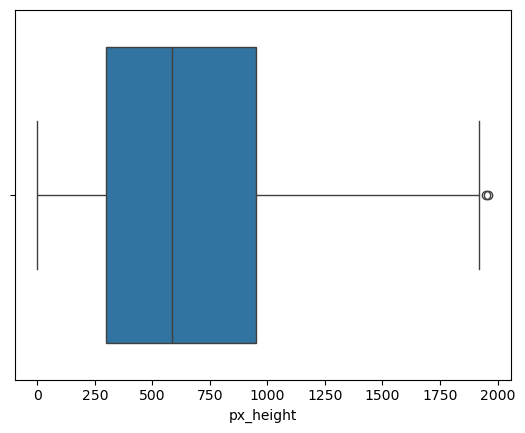

In [21]:
sns.boxplot(x=train_data["px_height"])

<Axes: xlabel='px_height', ylabel='Count'>

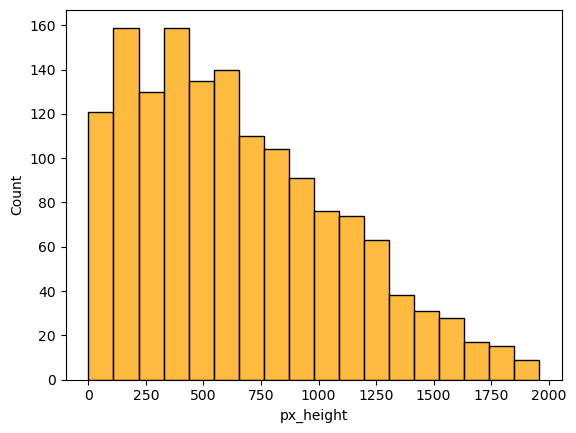

In [22]:
sns.histplot(data=train_data, x="px_height",color="orange")

### The distribution appears to be quite similar to sc_w feature above and it similarly has a sizable number of rows that contain 0 value. **It will require further investigation later**

In [23]:
#Print the number of rows px_height equal to 0 and yet having px_width > 0
print("Number of rows with px_height == 0 :  ",len(train_data[(train_data["px_height"] == 0)]))
train_data[(train_data["px_height"] == 0) & (train_data["px_width"] > 0)]

Number of rows with px_height == 0 :   2


,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
782,1481,1834,0,2.1,0,7,1,40,0.1,99,...,0,1987,3692,13,0,16,1,1,0,3
1487,1933,897,1,2.0,0,3,1,2,0.6,154,...,0,994,1958,7,5,7,1,1,0,1


### Mobile weight univariate analysis

In [24]:
print("The min of mobile weight (mobile_wt) is ", train_data["mobile_wt"].min())
print("The min of mobile weight (mobile_wt) is ", train_data["mobile_wt"].median())
print("The min of mobile weight (mobile_wt) is ", train_data["mobile_wt"].max())

The min of mobile weight (mobile_wt) is  80
The min of mobile weight (mobile_wt) is  141.0
The min of mobile weight (mobile_wt) is  200


<Axes: xlabel='mobile_wt'>

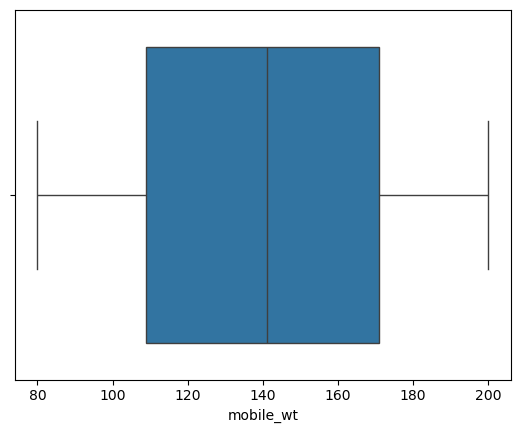

In [25]:
sns.boxplot(x=train_data["mobile_wt"])

<Axes: xlabel='mobile_wt', ylabel='Count'>

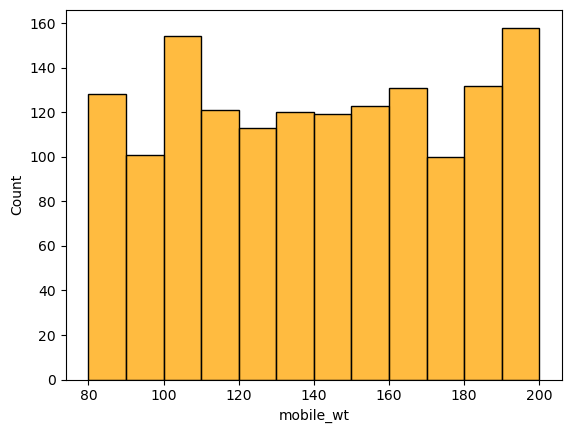

In [26]:
sns.histplot(data=train_data, x="mobile_wt",color="orange")

### The distribution of the mobile_wt is approximately balanced

### Ram univariate analysis

In [27]:
print("The min of RAM is ", train_data["ram"].min())
print("The median of RAM is ", train_data["ram"].median())
print("The max of RAM is ", train_data["ram"].max())

The min of RAM is  256
The median of RAM is  2102.5
The max of RAM is  3998


<Axes: xlabel='ram'>

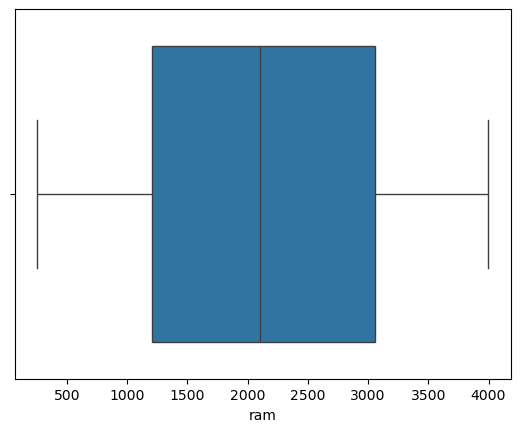

In [28]:
sns.boxplot(x=train_data["ram"])

<Axes: xlabel='ram', ylabel='Count'>

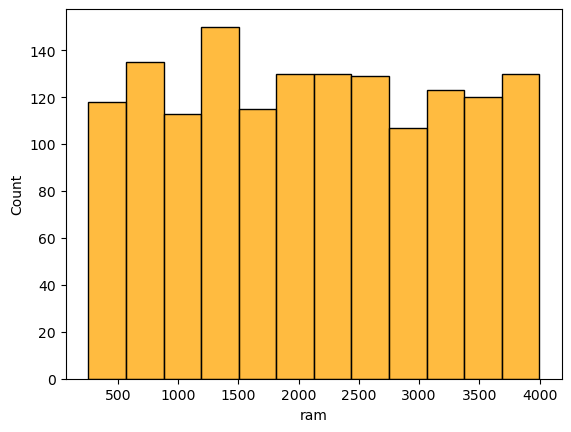

In [29]:
sns.histplot(data=train_data, x="ram",color="orange")

### Similarly, the distribution of the ram seems to be quite well-balanced.

### Battery power univariate analysis

In [30]:
print("The min of battery power is ", train_data["battery_power"].min())
print("The median of battery power is ", train_data["battery_power"].median())
print("The max of battery power is ", train_data["battery_power"].max())

The min of battery power is  501
The median of battery power is  1209.0
The max of battery power is  1998


<Axes: xlabel='battery_power'>

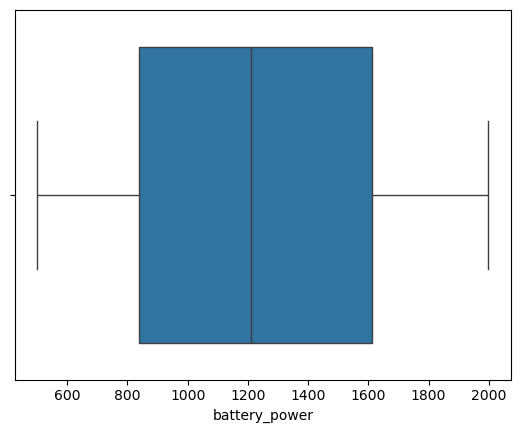

In [31]:
sns.boxplot(x=train_data["battery_power"])

<Axes: xlabel='battery_power', ylabel='Count'>

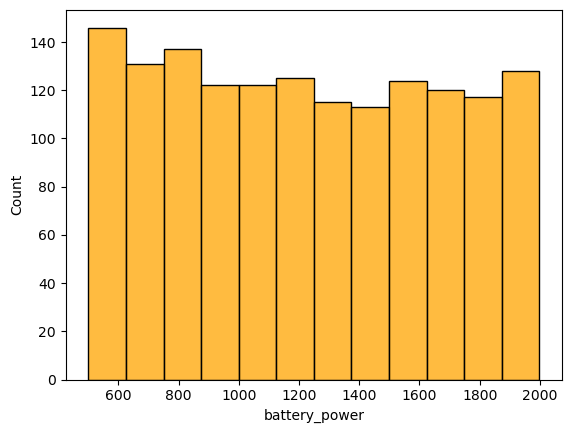

In [32]:
sns.histplot(data=train_data, x="battery_power",color="orange")

### The distribution seems quite well-balanced

### Clock speed univariate analysis

In [33]:
print("The min of clock speed is ", train_data["clock_speed"].min())
print("The median of clock speed is ", train_data["clock_speed"].median())
print("The max of clock speed is ", train_data["clock_speed"].max())

The min of clock speed is  0.5
The median of clock speed is  1.5
The max of clock speed is  3.0


<Axes: xlabel='clock_speed'>

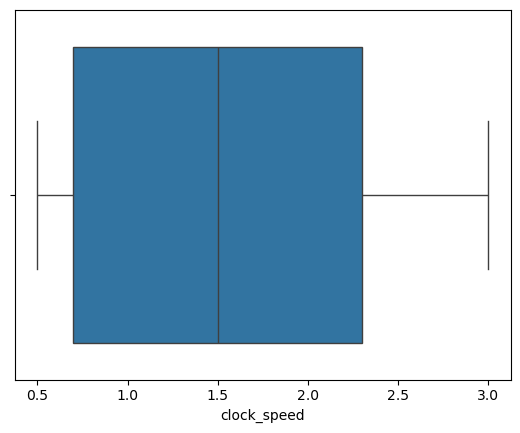

In [34]:
sns.boxplot(x=train_data["clock_speed"])

### 50% of the mobile phoness has clock speed between 0.75 and 2.25 from the boxplot

<Axes: xlabel='clock_speed', ylabel='Count'>

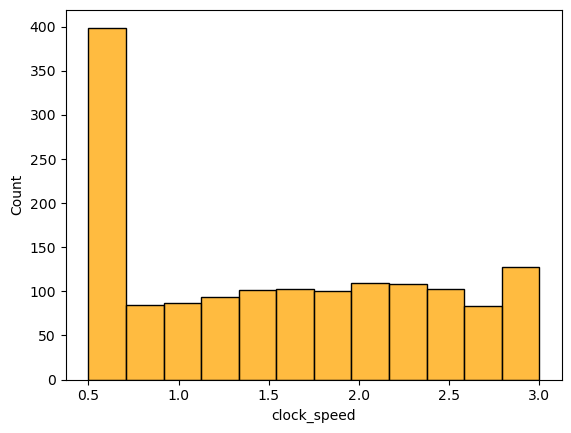

In [35]:
sns.histplot(data=train_data, x="clock_speed",color="orange")

### The distribution has a spike from the range of 0.5 - 0.75, making it an exponential relationship. Although the differnce is not order of magnitudes, **relative changes such as x2 more or x4 moore is considered to be straightforward and intuitive.** Hence, log transformation would be performed on the clock_speed. The skewness is not of a significant concern here as the log transformation is more of a substantive reasoning rather than a statistical one. Anyway, when log transformation is performed, the skewness should be reduced as well.

### Wifi univariate analysis

<Axes: xlabel='wifi', ylabel='count'>

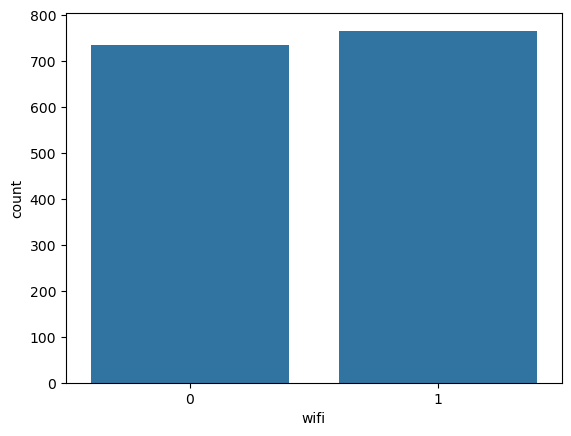

In [36]:
sns.countplot(train_data,x="wifi")

### The distribution of the mobile phones with wifi feature and without feature is approximately balanced

### four_g univariate analysis

<Axes: xlabel='four_g', ylabel='count'>

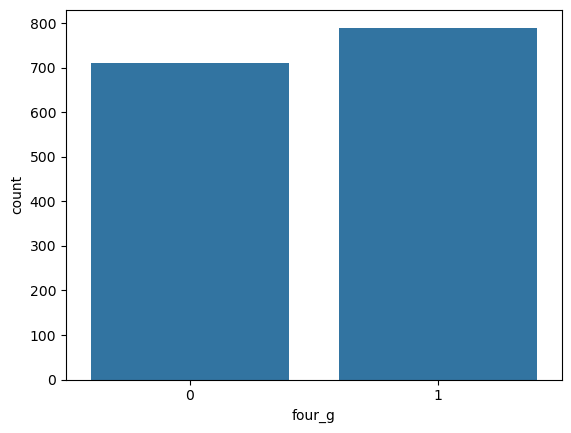

In [37]:
sns.countplot(train_data,x="four_g")

### The distribution of the mobile phones with 4G feature and without 4G is also approximately balanced

### three_g feature univariate analysis

<Axes: xlabel='three_g', ylabel='count'>

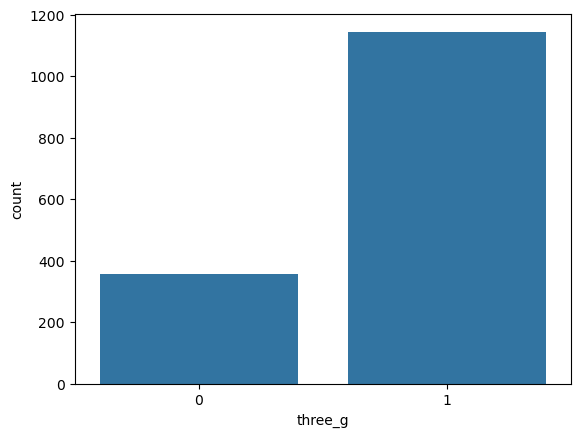

In [38]:
sns.countplot(train_data,x="three_g")

### **Explore if feature can be engineered using the three_g and 4G features.** However, do not over-engineer and misrepresent if the understanding of 4G and 3G network. Do a sanity check first.

### dual_sim univariate analysis

<Axes: xlabel='dual_sim', ylabel='count'>

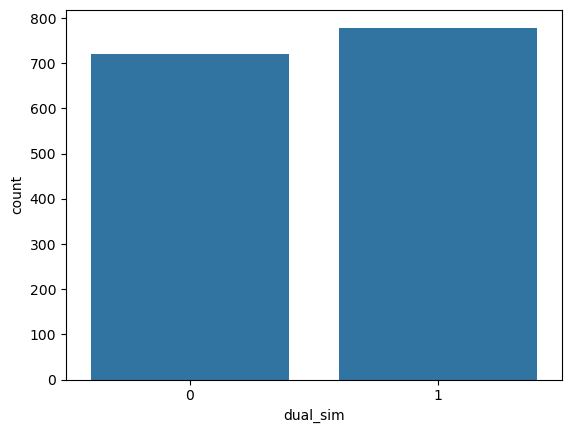

In [39]:
sns.countplot(train_data,x="dual_sim")

### The distribution of dual_sim phones is quite well-balanced. The phones that **do not support dual_sim are rather old** since it is a tech that is qutie well-supported on most phones.

### touch_screen univariate analysis

<Axes: xlabel='touch_screen', ylabel='count'>

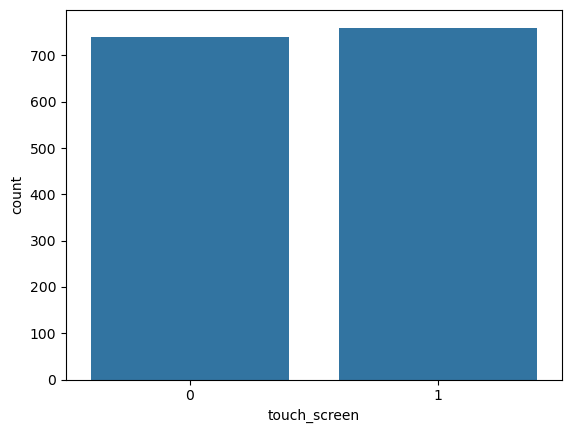

In [40]:
sns.countplot(train_data,x="touch_screen")       

### The split of touch_screen phones and non touch_screened phones is equally balanced.

## Multivariate Analysis

### Categorical Feature - touch_screen

In [41]:
train_data.groupby(['touch_screen','price_range'])[["price_range"]].count()

price_range
touch_screen price_range             
0            0                    181
             1                    173
             2                    198
             3                    188
1            0                    196
             1                    214
             2                    165
             3                    185

<Axes: xlabel='touch_screen', ylabel='count'>

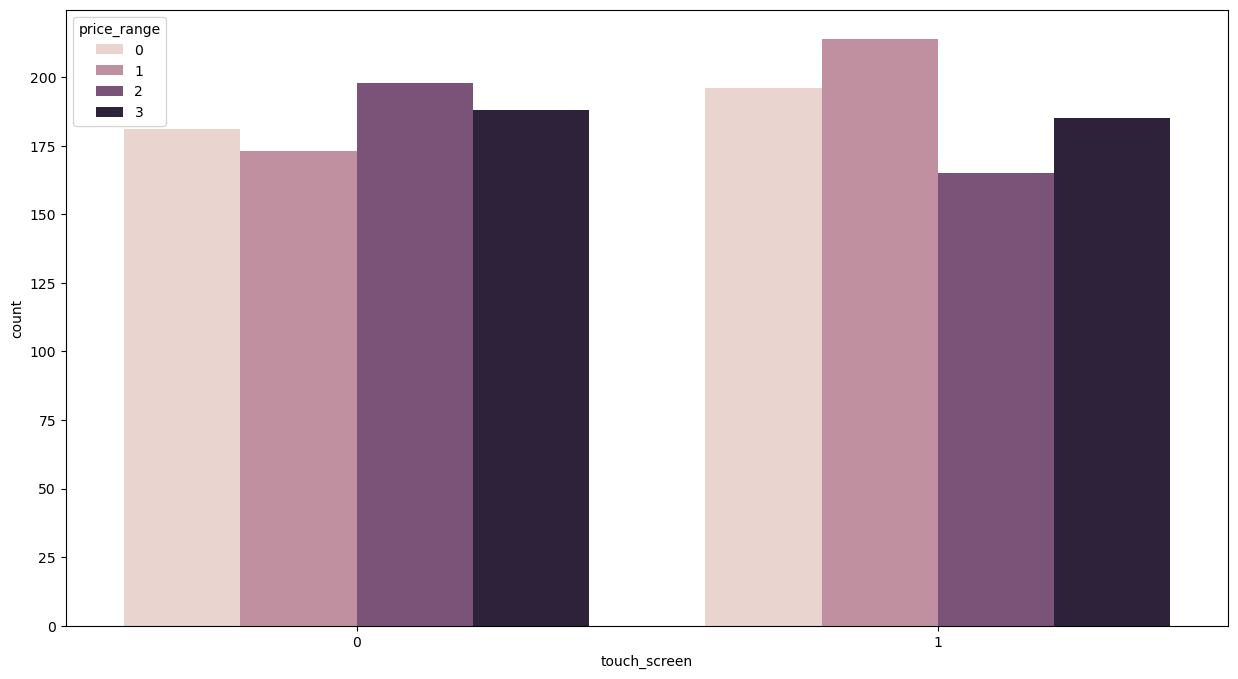

In [42]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=train_data,x="touch_screen",hue="price_range",ax=ax)

<Axes: xlabel='touch_screen', ylabel='proportion'>

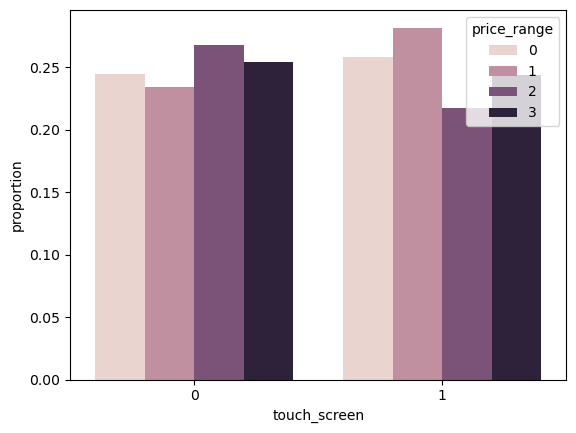

In [43]:
#Create the normalized series
transformed_series = train_data.groupby(["touch_screen"])[["price_range"]].value_counts(normalize=True)
transformed_series
transformed_df = transformed_series.to_frame()
sns.barplot(data=transformed_df,x="touch_screen",hue="price_range",y="proportion")

### Surprisingly, the **distribution of the price categories seems to be quite similar** though there are some slight differences between the price ranges (2 and 3 is slightly lower for with touch screen while 0 and 1 is slightly higher for touch screen). It is surprising as it is thought that the price ranges for touch screens can be considerably higher than those without touch screen. A possible reason is that the price are the prices when the products are released and not the present price of phones without touch_screen.

### Categorical Feature - dual sim

In [44]:
train_data.groupby(['dual_sim','price_range'])[["price_range"]].count()

price_range
dual_sim price_range             
0        0                    188
         1                    184
         2                    182
         3                    167
1        0                    189
         1                    203
         2                    181
         3                    206

<Axes: xlabel='dual_sim', ylabel='count'>

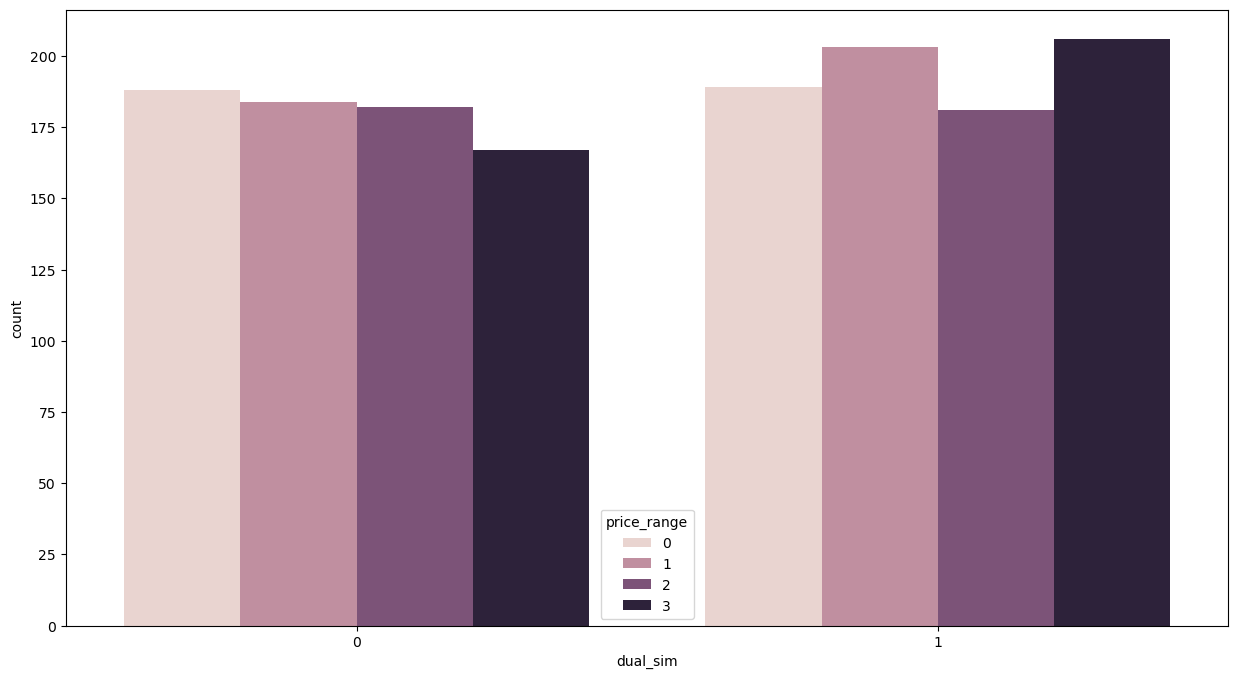

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=train_data,x="dual_sim",hue="price_range",ax=ax)

<Axes: xlabel='dual_sim', ylabel='proportion'>

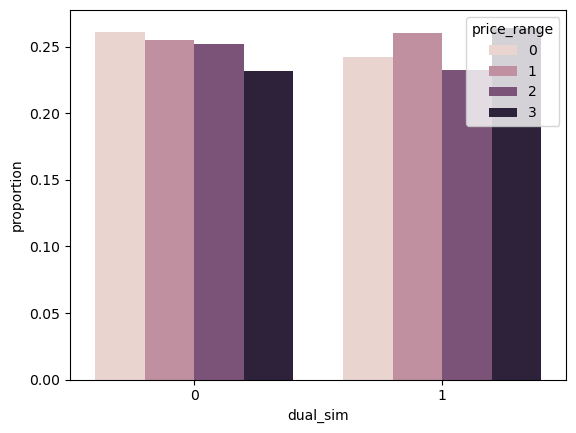

In [46]:
#Create the normalized series
transformed_series = train_data.groupby(["dual_sim"])[["price_range"]].value_counts(normalize=True)
transformed_series
transformed_df = transformed_series.to_frame()
sns.barplot(data=transformed_df,x="dual_sim",hue="price_range",y="proportion")

### Similarly, whether dual_sim as a feature is present does not seem to significantly alter the price categories distribution.

### Touch Screen + dual_sim 

In [47]:
pd.crosstab([train_data["touch_screen"],train_data["dual_sim"]],train_data["price_range"],
            margins=True).style.background_gradient(cmap='summer_r')

### Categorical Feature - three_g

In [48]:
train_data.groupby(['three_g','price_range'])[["price_range"]].count()

price_range
three_g price_range             
0       0                     99
        1                     92
        2                     79
        3                     85
1       0                    278
        1                    295
        2                    284
        3                    288

<Axes: xlabel='three_g', ylabel='count'>

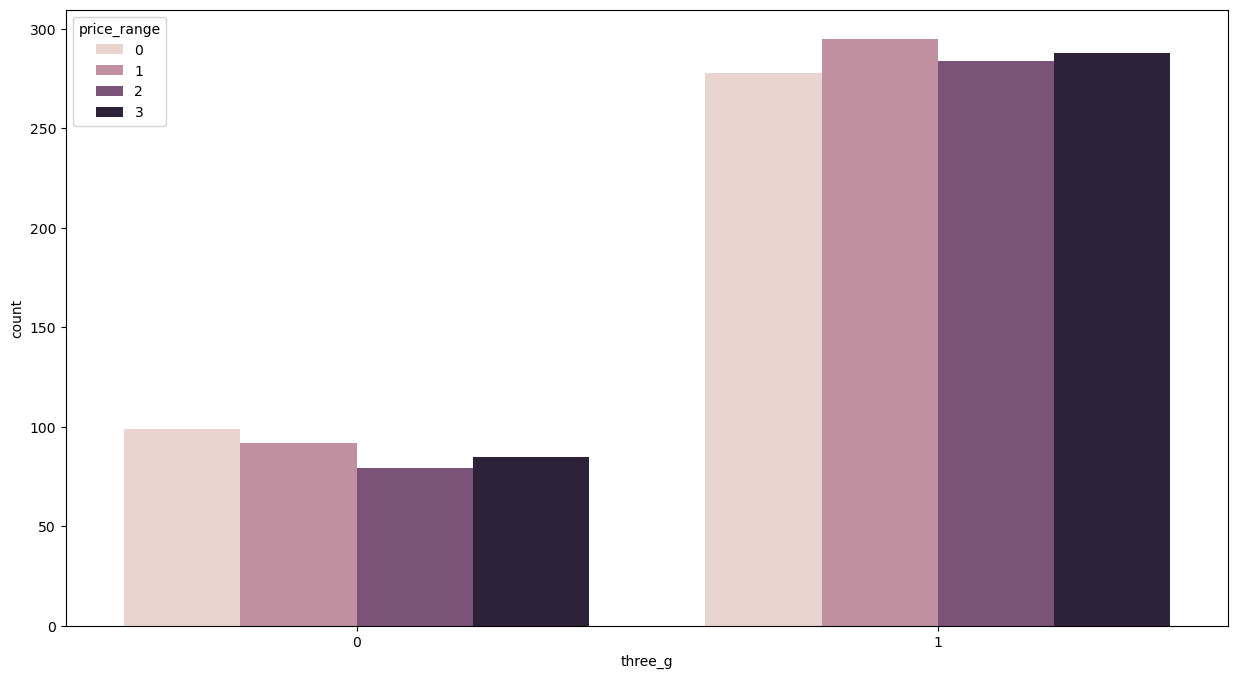

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=train_data,x="three_g",hue="price_range",ax=ax)

<Axes: xlabel='three_g', ylabel='proportion'>

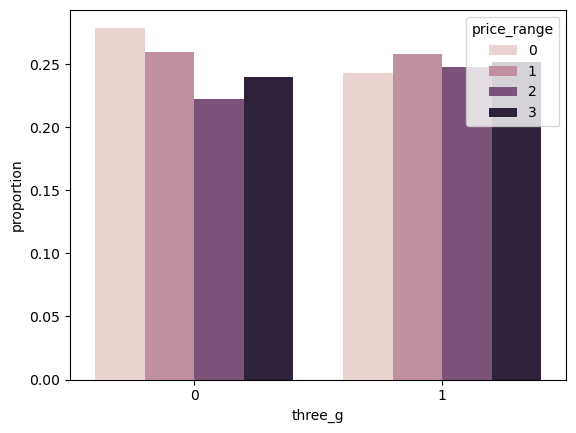

In [50]:
#Create the normalized series
transformed_series = train_data.groupby(["three_g"])[["price_range"]].value_counts(normalize=True)
transformed_series
transformed_df = transformed_series.to_frame()
sns.barplot(data=transformed_df,x="three_g",hue="price_range",y="proportion")

### Although the countplot may show a steep difference in the bar heights, the **proportion (actual distribution) actually shows that the distributions are quite similar**, without significant differences, especially considering that the y label is in the order of 0.05 tick intervals.

### Categorical Feature - four_g

In [51]:
train_data.groupby(['four_g','price_range'])[["price_range"]].count()

price_range
four_g price_range             
0      0                    177
       1                    186
       2                    183
       3                    164
1      0                    200
       1                    201
       2                    180
       3                    209

<Axes: xlabel='four_g', ylabel='proportion'>

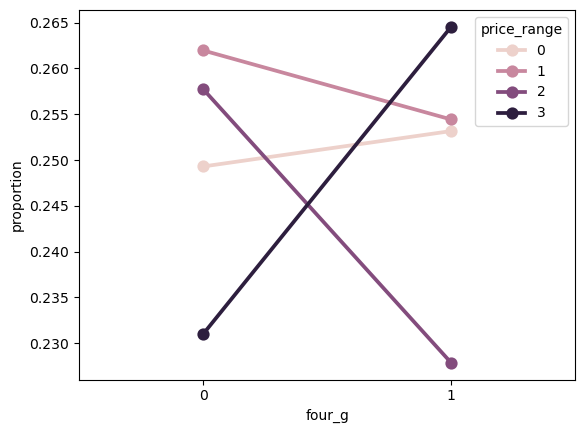

In [52]:
transformed_series = train_data.groupby(["four_g"])[["price_range"]].value_counts(normalize=True)
transformed_df = transformed_series.to_frame()
sns.pointplot(data=transformed_df,x="four_g",hue="price_range",y="proportion")

<Axes: xlabel='four_g', ylabel='proportion'>

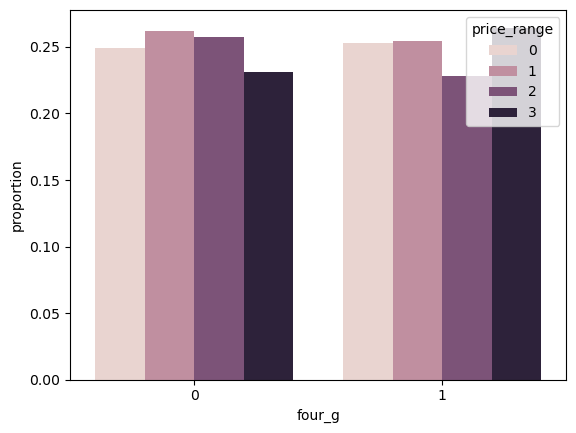

In [53]:
#Create the normalized series
transformed_series = train_data.groupby(["four_g"])[["price_range"]].value_counts(normalize=True)
transformed_series
transformed_df = transformed_series.to_frame()
sns.barplot(data=transformed_df,x="four_g",hue="price_range",y="proportion")

### Again, the distributions do not differ significantly or widely given the y-interval tick marks are 0.05

### Categorical Feature - three_g + four_g vs price_range

In [54]:
pd.crosstab([train_data["three_g"],train_data["four_g"]],train_data["price_range"],
            margins=True).style.background_gradient(cmap='summer_r')

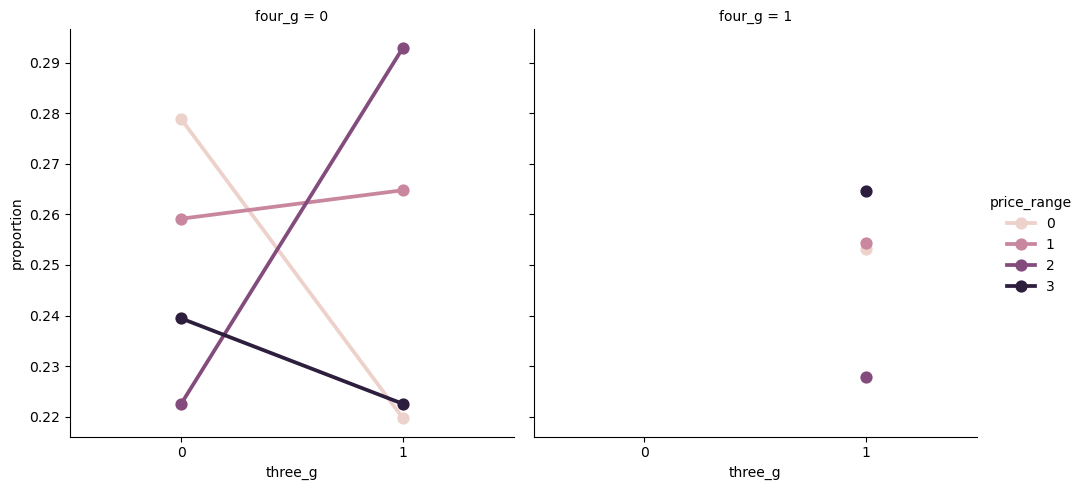

In [55]:
transformed_series = train_data.groupby(["three_g","four_g"])[["price_range"]].value_counts(normalize=True)
transformed_df = transformed_series.to_frame()
sns.catplot(data=transformed_df,x="three_g",y="proportion",hue="price_range",
            col="four_g",kind="point")
plt.show()

### No 4G phone does not support 3G phone. Technically, 4G phones have backward compatability with 3G.

### Categorical Feature - wifi

In [56]:
train_data.groupby(['wifi','price_range'])[["price_range"]].count()

price_range
wifi price_range             
0    0                    187
     1                    189
     2                    180
     3                    178
1    0                    190
     1                    198
     2                    183
     3                    195

<Axes: xlabel='wifi', ylabel='proportion'>

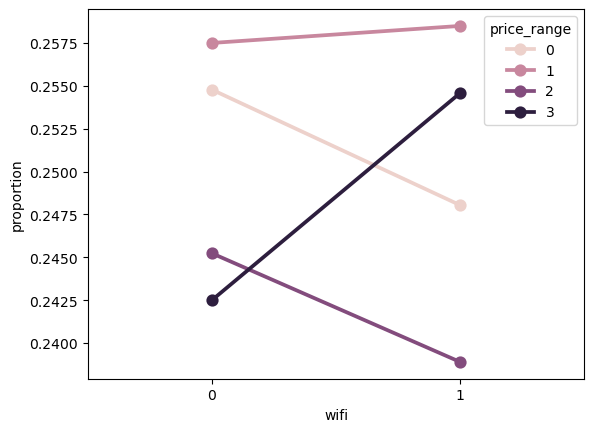

In [57]:
transformed_series = train_data.groupby(["wifi"])[["price_range"]].value_counts(normalize=True)
transformed_df = transformed_series.to_frame()
sns.pointplot(data=transformed_df,x="wifi",hue="price_range",y="proportion")

<Axes: xlabel='wifi', ylabel='proportion'>

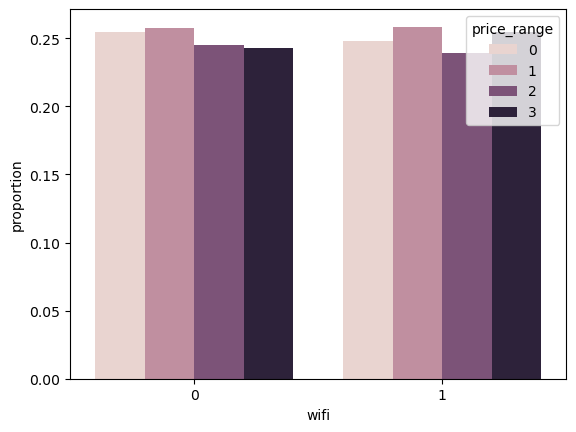

In [58]:
#Create the normalized series
transformed_series = train_data.groupby(["wifi"])[["price_range"]].value_counts(normalize=True)
transformed_series
transformed_df = transformed_series.to_frame()
sns.barplot(data=transformed_df,x="wifi",hue="price_range",y="proportion")

### Continuous feature mobile_wt

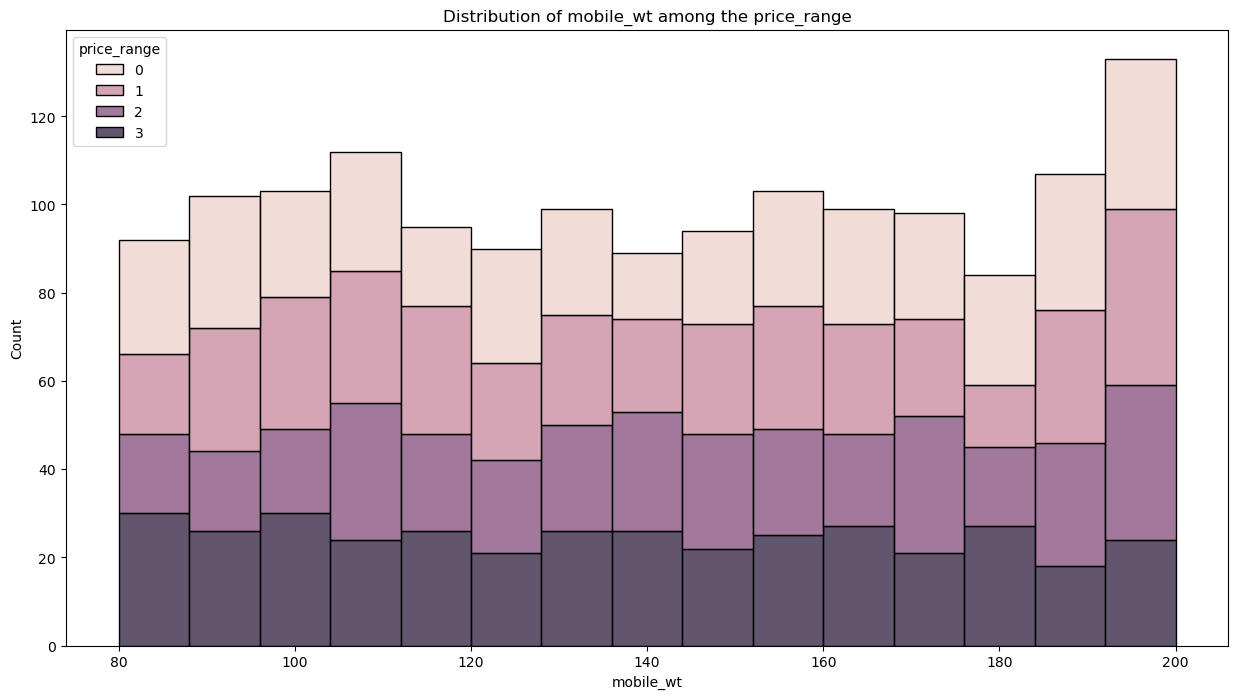

In [59]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="mobile_wt", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of mobile_wt among the price_range")
plt.show()

### Features - mobile_wt + blue_screen

<Axes: xlabel='blue', ylabel='mobile_wt'>

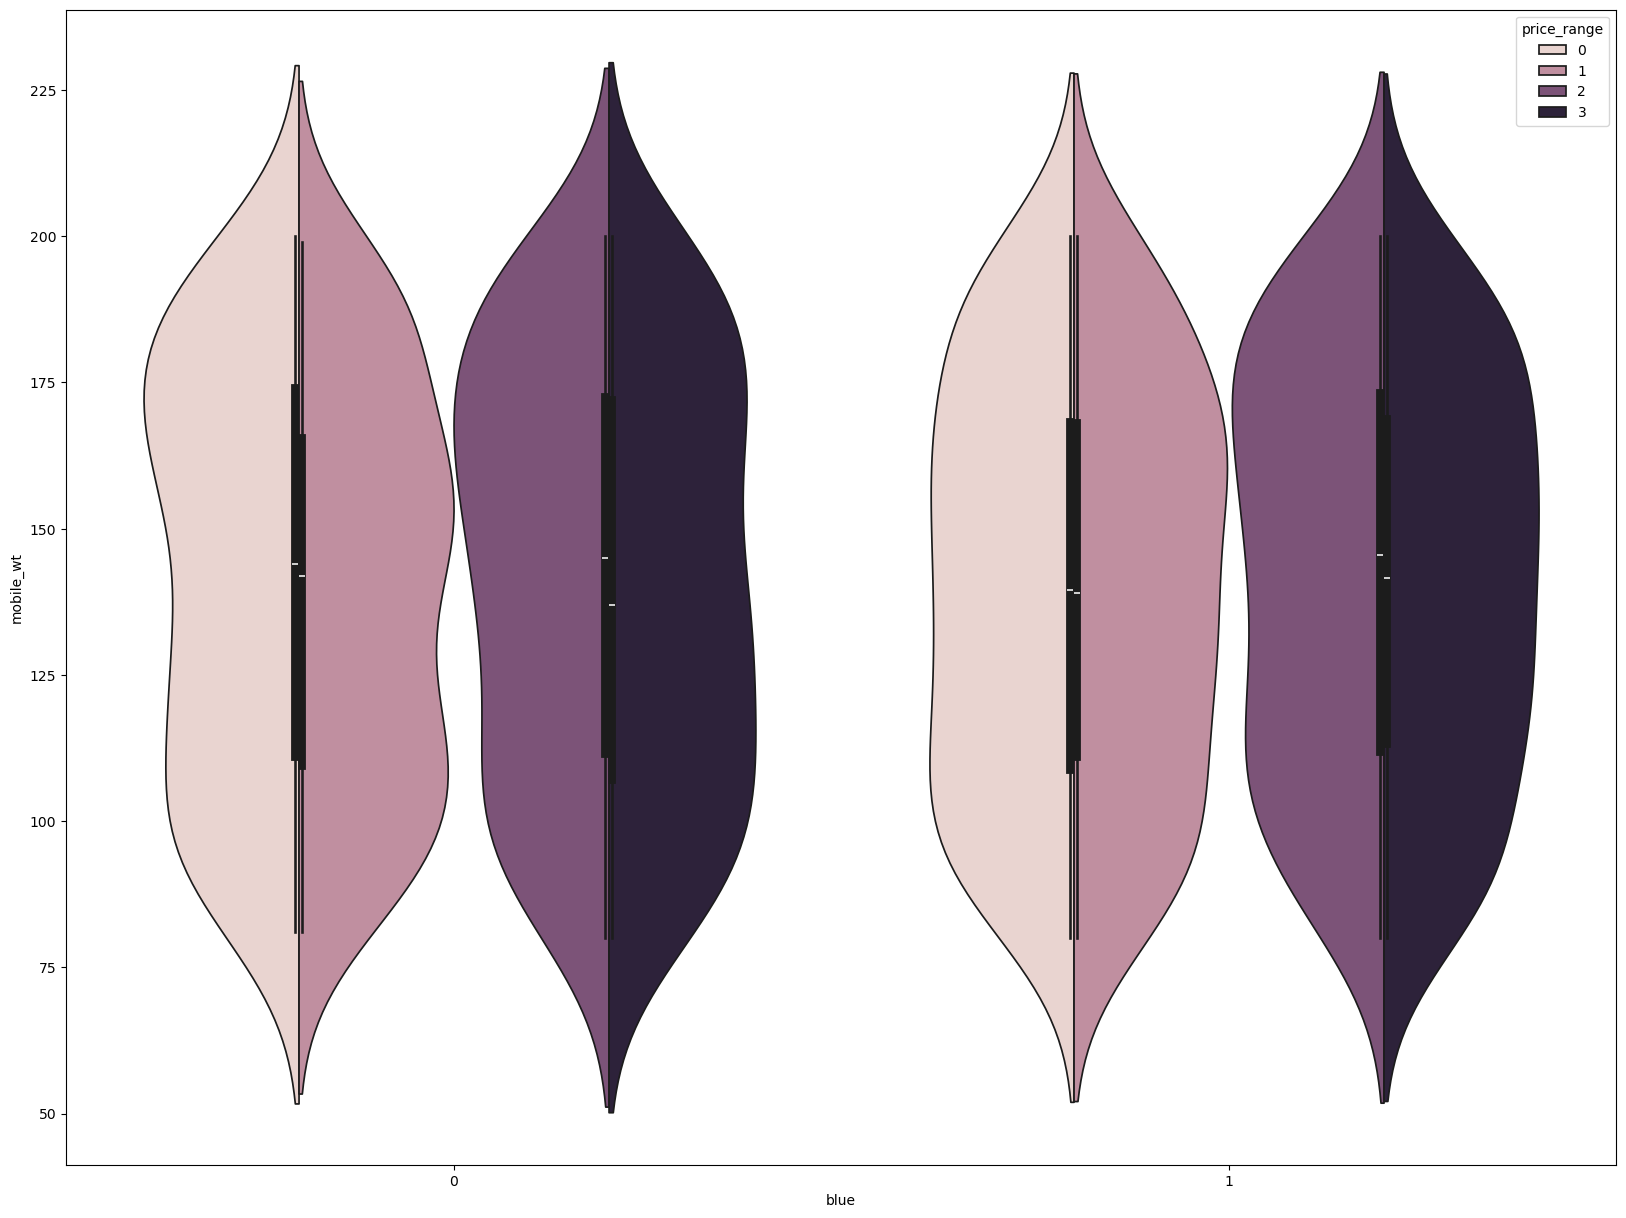

In [63]:
fig, ax = plt.subplots(figsize=(20,15))
transformed_series = train_data.groupby(["mobile_wt","blue"])[["price_range"]].value_counts()
transformed_df = transformed_series.to_frame()
sns.violinplot(data=transformed_df,x="blue",y="mobile_wt",hue="price_range",
               split=True,ax=ax)

### Generally, the distributions do not differ significantly. 
### For the phones with blue screen, there is a slightly greater percentage of the phones with heavier weight to be in price range 3 and 1 as compared to phones without blue screen. Similarly, for the phones without blue screen, there is a greater percentage of the phones with heavier weight to be in price range 0 and 2.

### Continuous Feature - RAM

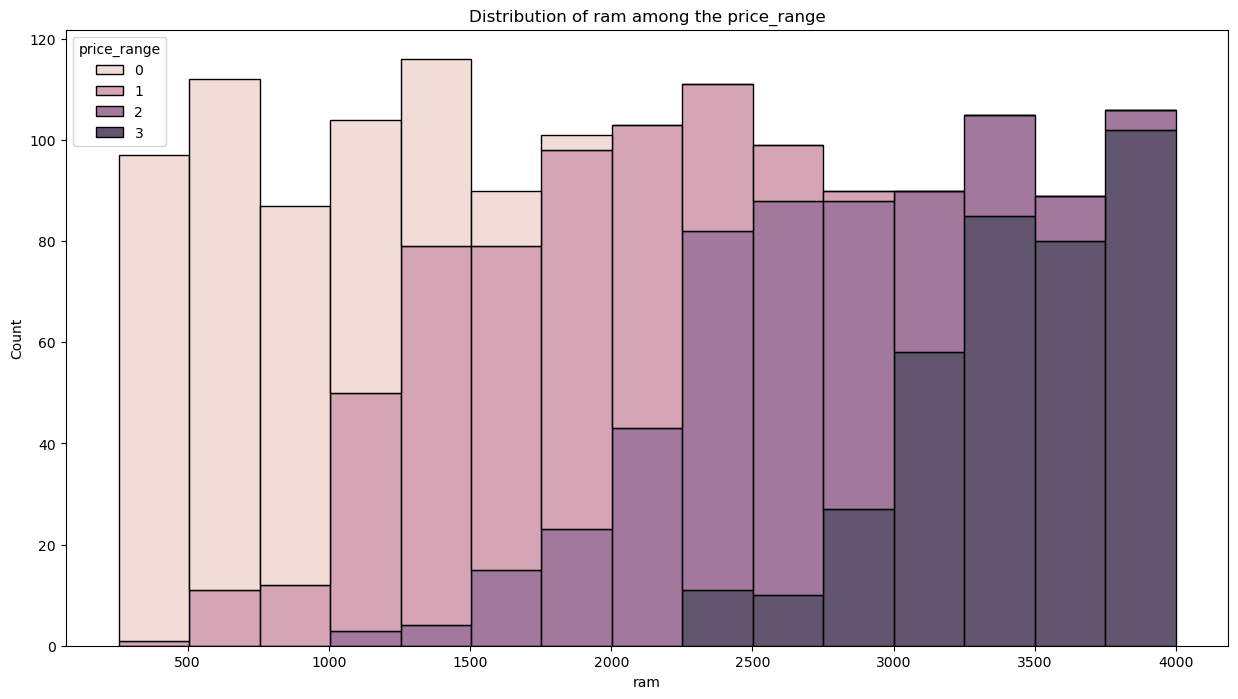

In [67]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="ram", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of ram among the price_range")
plt.show()

### RAM is a very interesting feature from the above plot. It clearly shows that **as ram increases, the distirubtions of the price range categories also significantly chagnes across price_range categories.** There is also non-linearity trend that we can consider, given that how ram varies compared to the individual price_range categories is not linear as clearly evident for price_range 3, price_range 0.

### **Can explore using spline transformations to model non-linearity and check if it enhances the predictive performance of the model**

### Continuous feature - Battery power

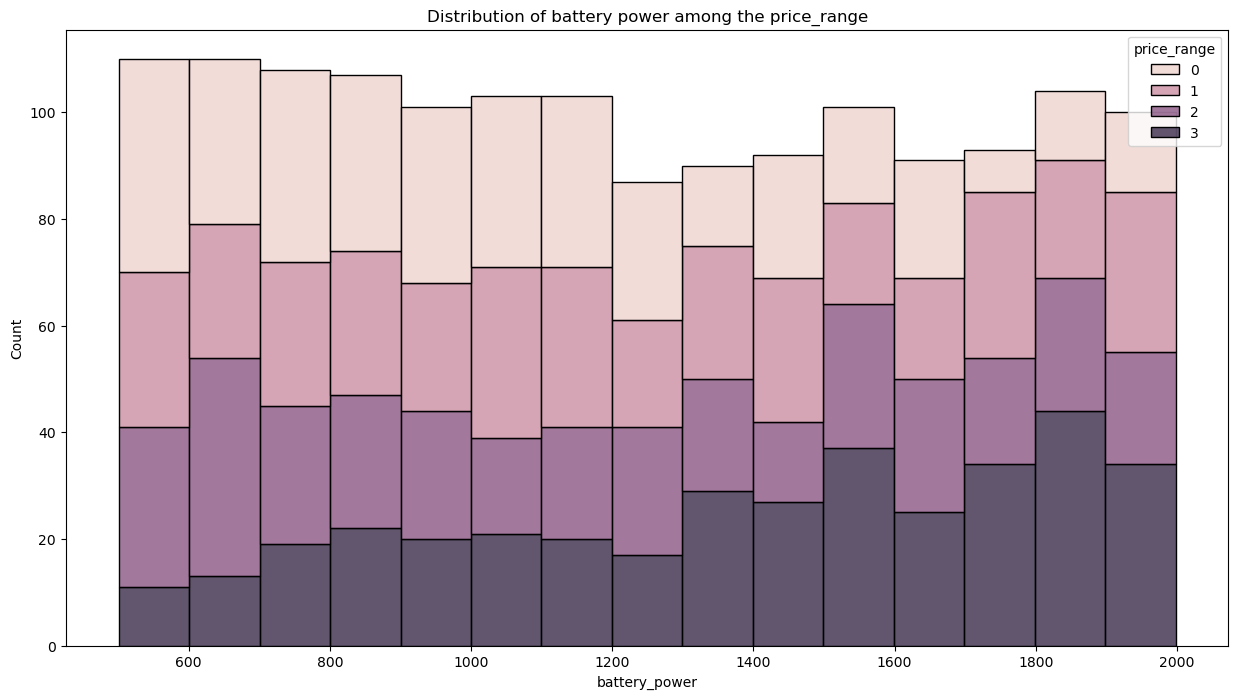

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="battery_power", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of battery power among the price_range")
plt.show()

### Similarly, battery power seems to be an interesting feature. As the battery power rises, it can be observed that the distribution of price_range 3 generally increases, while the distribution of the price_range 0 generally decreases. The non-linearity trend does not seem to be as clearly evident as compared to ram.

### Continuous Feature - Clock Speed

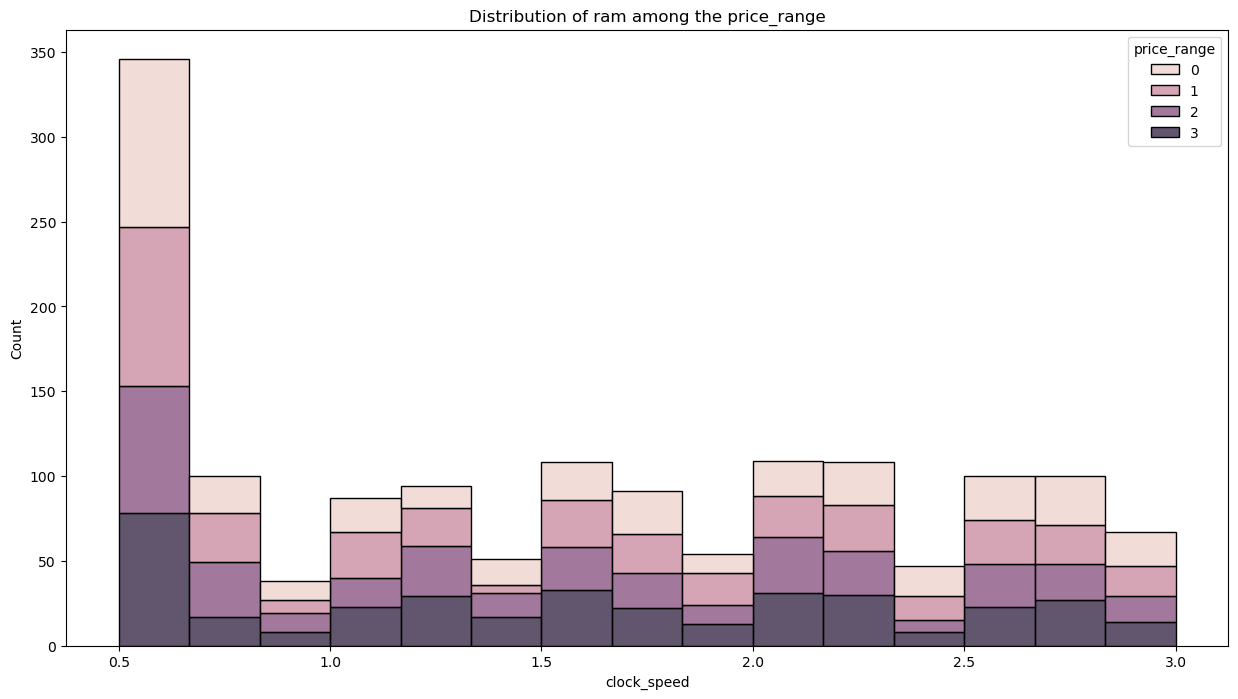

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="clock_speed", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of clcok speed among the price_range")
plt.show()

### The distribution of the price_range categories across clock_speed for the various price_range categories seems to be quite similar. It may not add substantially ot the predictive power of the model since the distributions of the different price_ranges are very close across clock_speed.

### There is a non-linearity trend for the price_range categories, though **it is unsure how would it aid predictive performance given that the distribution among the price_range categories is all modelling this distribution.**

### Continuous Feature - px_height (pixel height)

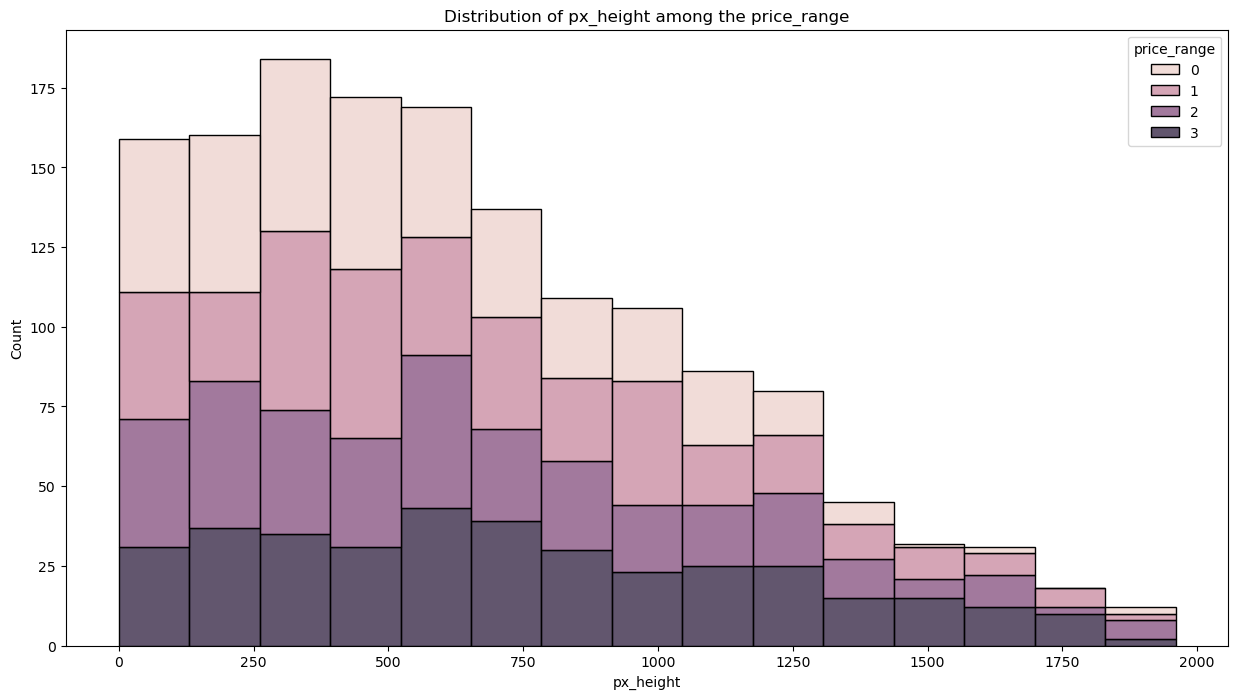

In [76]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="px_height", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of px_height among the price_range")
plt.show()

### The pixel height feature can **increase the predictive performance of the model** as when pixel height increases, the **distribution has greatly changed to a majority of either price_range 2 or 3 and minimally 1.** Additionally, the distribution of 0 is very close to 0 near the very high percentles of px_height.

### The non-linearity trend is not very evident and can be subtle for price_range 3. **Spline transformation can be trialled with iterative improvements to compare whether it truely adds to the predictive performance of the model to predict price_range**


### Continuous Feature - px_width (pixel width)

<function matplotlib.pyplot.show(close=None, block=None)>

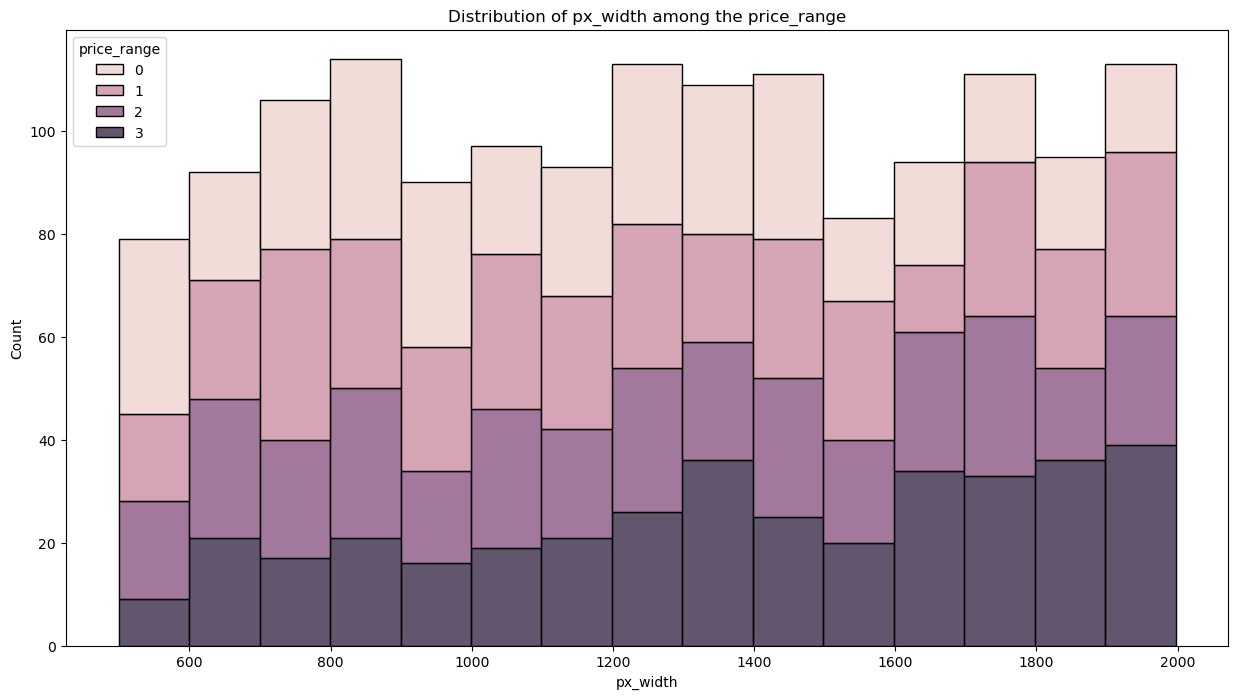

In [77]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="px_width", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of px_width among the price_range")
plt.show

### It is evident from the above plot that as pixel_width increases, the distribution for cateogry 3 of price_range increases, while the distribution for category 0 of price_range decreases. **There is some non-linearity for the distributions, while price_range 2 seems to be quite constant. This could perhaps be a good signal to the model**

### Continuous feature - sc_h (screen height)

<function matplotlib.pyplot.show(close=None, block=None)>

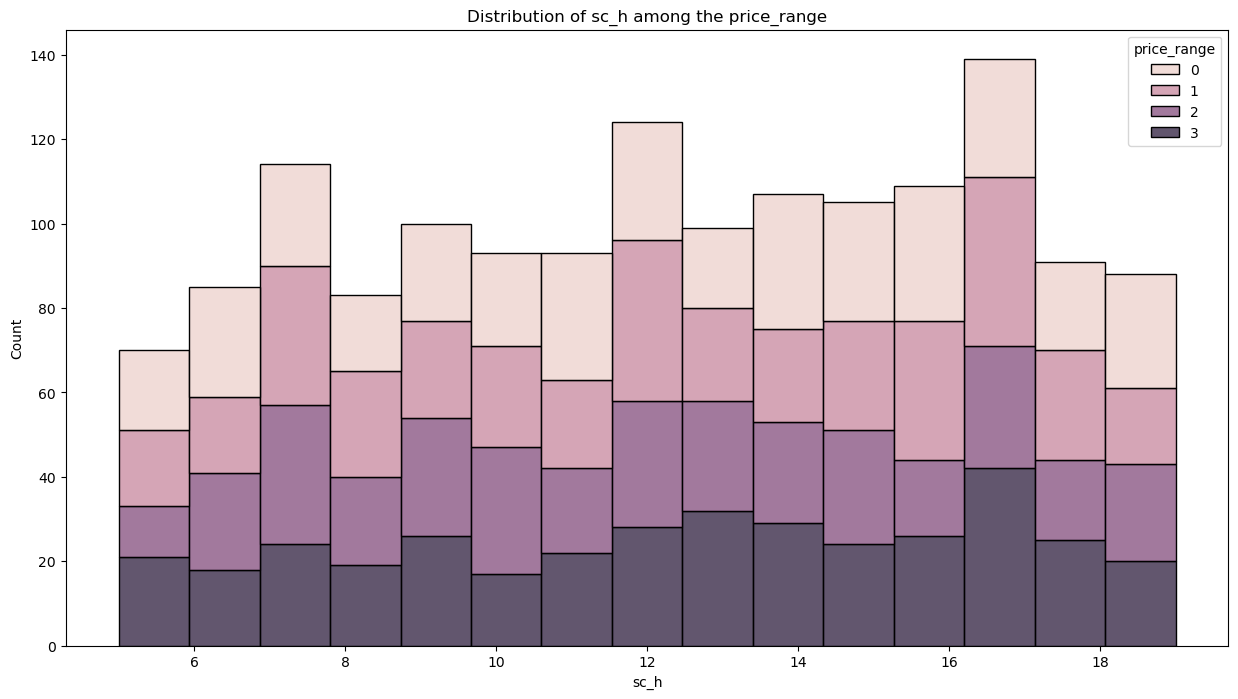

In [83]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="sc_h", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of sc_h among the price_range")
plt.show

### The distribution differences across the price_range seems to be marginal, though there are still some subtle differences. It can still help with the predictive power of the model.

### Continuous feature - sc_w (screen width)

<function matplotlib.pyplot.show(close=None, block=None)>

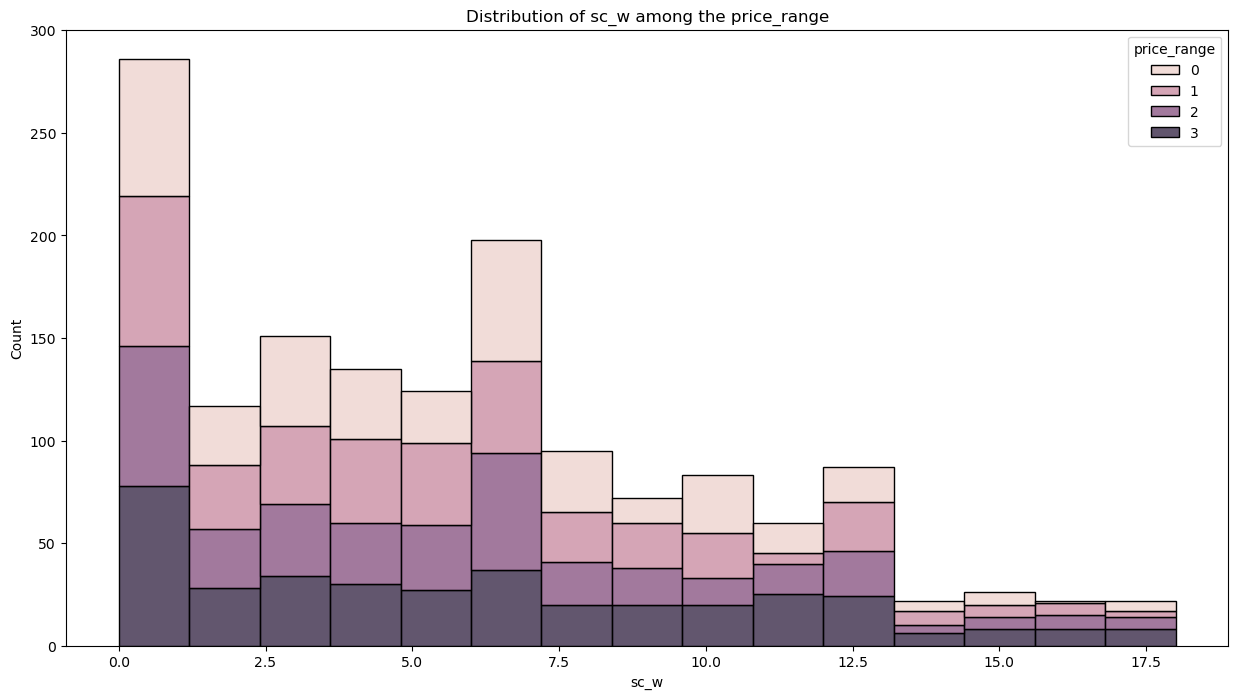

In [84]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="sc_w", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of sc_w among the price_range")
plt.show

### The distributions of the sc_w seems to be quite similar. At the interval from 11 to 12, the proprotion of price_range 1 was signifcantly smaller than the rest, which is surprising, given that the proportions across the sc_w from 0 to 11 had been quite consistent without changes. Similarly, the **proportion of price_range 0 at 16 - 17 was low as well.**

### n_cores multivariate analysis (discrete variable)

<function matplotlib.pyplot.show(close=None, block=None)>

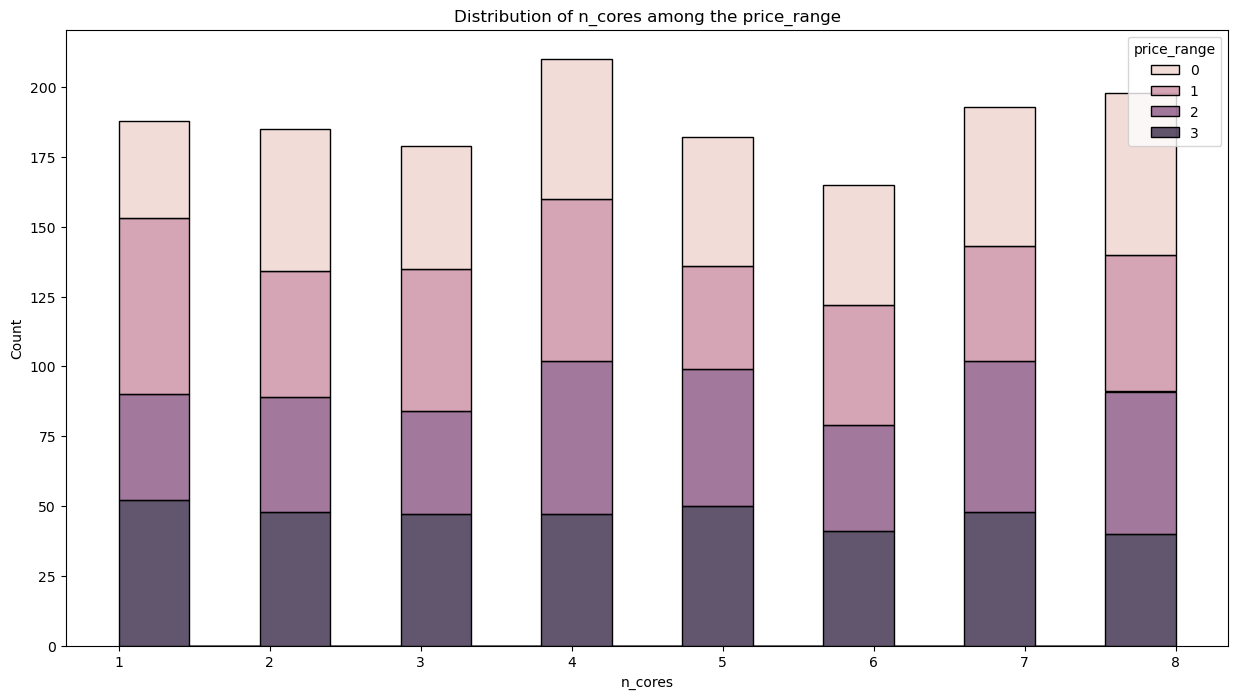

In [93]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="n_cores", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of n_cores among the price_range")
plt.show

### The proportion of price_range seems quite fairly distributed across n_cores.

### int_memory multivariate analysis (discrete variable)

<function matplotlib.pyplot.show(close=None, block=None)>

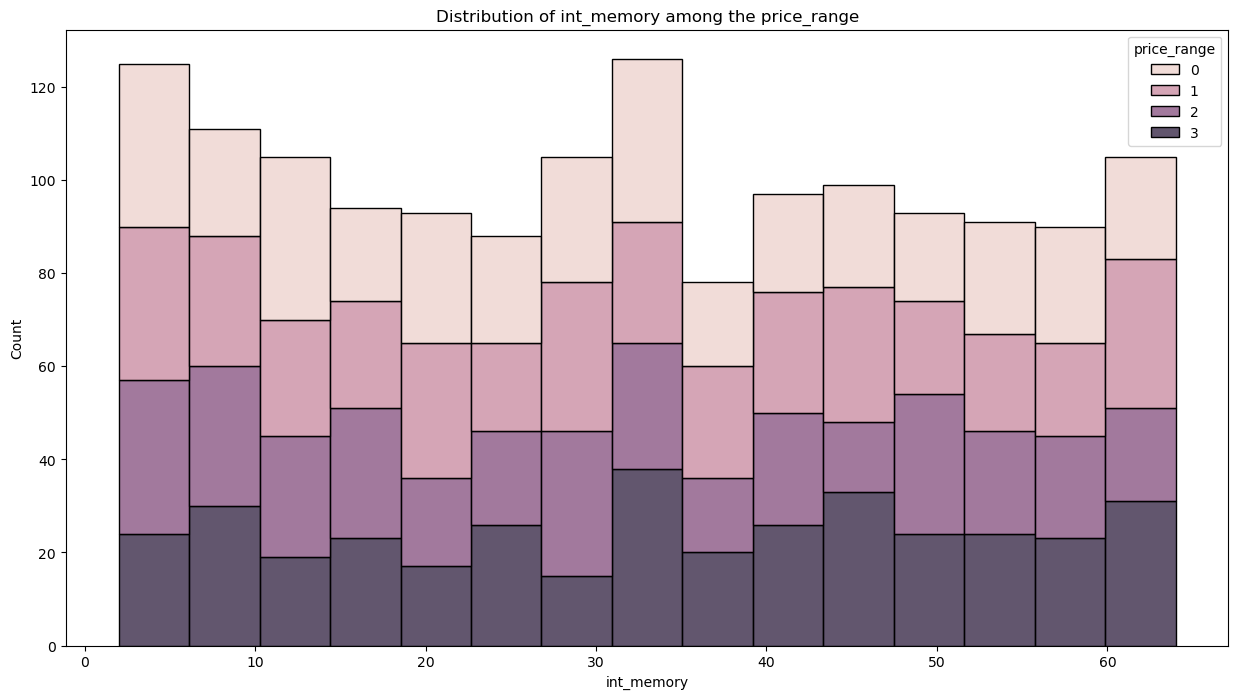

In [94]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="int_memory", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of int_memory among the price_range")
plt.show

### At 60-64, the price_range category of 0 seems to have a slight decrease whereas the price_range category of 3 seems to have a slight uptick as compared to the distribution when int_memory is less than 60.

### Missing Values (EDA)

In [97]:
ncounts = pd.DataFrame(train_data.isna().mean())
ncounts = ncounts.rename(columns={0:"train_missing"})
ncounts

,train_missing
Unnamed: 0,0.0
battery_power,0.0
blue,0.0
clock_speed,0.0
dual_sim,0.0
fc,0.0
four_g,0.0
int_memory,0.0
m_dep,0.0
mobile_wt,0.0


### There are no np.nan values for all columns. However, the missing values may be represented by other values such as 0 and may not only be solely represented by 0s. **Intuitively, 0s would not make sense as a phone cannot have 0 px  height or 0 screen wdith**

In [100]:
#List of columns suspected to have missing values
cols = ["sc_w","px_height"]
#Indicate as columns amy be strings or ints
train_data[cols] = train_data[cols].replace({'0':np.nan, 0:np.nan})

### Re-run the check for missing values of the columns

In [103]:
ncounts = pd.DataFrame(train_data.isna().mean())
ncounts = ncounts.rename(columns={0:"train_missing"})
ncounts

,train_missing
Unnamed: 0,0.000000
battery_power,0.000000
blue,0.000000
clock_speed,0.000000
dual_sim,0.000000
fc,0.000000
four_g,0.000000
int_memory,0.000000
m_dep,0.000000
mobile_wt,0.000000


<Axes: title={'center': '% of missing values'}>

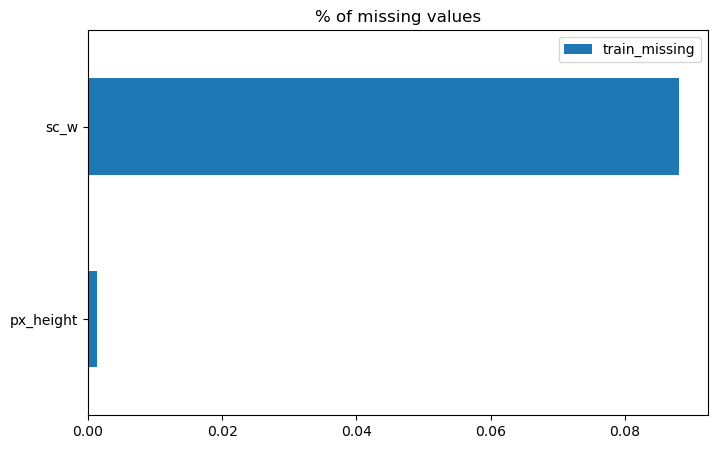

In [104]:
ncounts.query("train_missing > 0").plot(kind="barh",figsize=(8,5),
                                       title="% of missing values")

### Though it may seem there is a lot of missing values in sc_w, it is not the case as the x-axis labels are from the range of 0.00 to only 0.08. However, the disparity can be emphasised. It is fortunate that there is only a small percentage of missing values for sc_w and px_height so that imputation methods can be performed on these samples. Modelling can then be performed after imputation.

### **Multiple imputation** will be used to perform imputation as **simple imputations can alter the distribution** by introducing all missing values as either mean or meidan. **This has to be done in-fold and not oof, otherwise data leakage will occur.**

### **Imputation can be performed using Multiple Imputation or using tree-based models**

### Feature Engineering + EDA

### Creation of **old phone features** **using domain knowledge of features** - since old phones can have different price ranges during that period compared to new phones.

### Differentiating Features from domain knowledge are 1. wifi, bluetooth, 3. 4G, 4. touchscreen, 5. dual_sim

In [106]:
#Creation of binary old variable using domain knowledge of variables wifi, bluetooth, 4G, touchscreen, dual_sim)
train_data["old"] = 1
filter_rows = (train_data["wifi"] == 1) & (train_data["blue"] == 1) \
& (train_data["dual_sim"] == 1) & (train_data["four_g"] == 1) \
& (train_data["touch_screen"] == 1)
train_data.loc[filter_rows,"old"] = 0
train_data["old"].value_counts()

old
1    1437
0      63
Name: count, dtype: int64

<Axes: xlabel='old', ylabel='proportion'>

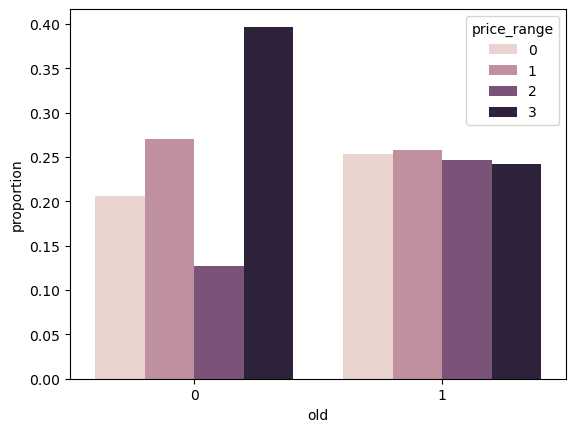

In [108]:
#Create the normalized series
transformed_series = train_data.groupby(["old"])[["price_range"]].value_counts(normalize=True)
transformed_series
transformed_df = transformed_series.to_frame()
sns.barplot(data=transformed_df,x="old",hue="price_range",y="proportion")

### It can be seen that the distribution between old and new phones seem to be quite different, especially for the price_range category of 3. **Thus, this can be an appropriate feature engineering.**

### New feature is not created since **it is redundant when it is a linear combination of old (1 - old = new).** It may even contribute to more features and not improve the predictive performance of the new

### Creation of **phone screen area since intuitively, bigger phones can translate to higher prices.** It still needs to be validated.

In [110]:
#Creation of binary old variable using domain knowledge of variables wifi, bluetooth, 4G, touchscreen, dual_sim)
train_data["screen_area"] = train_data["sc_w"] * train_data["sc_h"]
train_data["screen_area"].head()

0    144.0
1      NaN
2      NaN
3     48.0
4     10.0
Name: screen_area, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

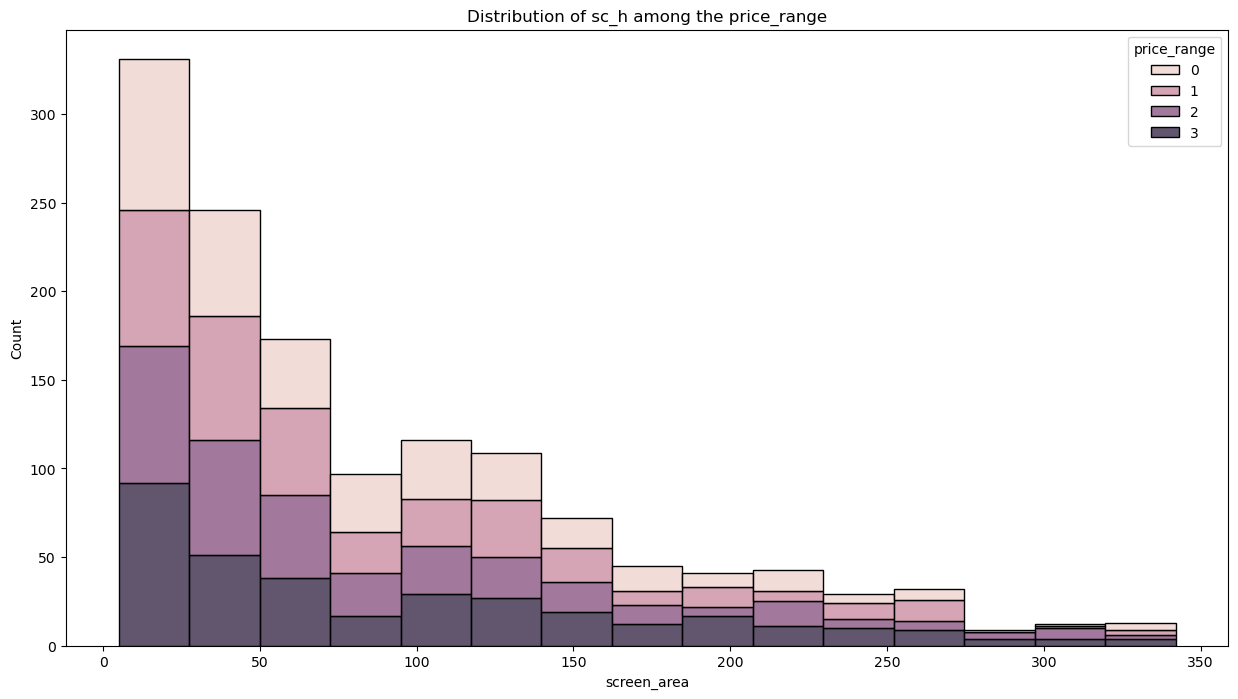

In [111]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=train_data, x="screen_area", hue="price_range", multiple="stack",bins=15,ax=ax)
ax.set_title("Distribution of sc_h among the price_range")
plt.show

### The distribution seems to be quite similar to sc_h and sc_w which is not surprising since it is a multiplcation of sc_w and sc_h. **This new feature may not add much value as the distribution across the price_ranges are very similar.**

### **Spline transformation** to be performed for the mlp pipeline too

## Summary

### Label Encoding is not required as the target labels are already laben encoded
### The binary features are already dummy encoded and as such no further preprocessing is required for that
### Missing values has to be imputed in-fold so that no data leakage will occur, giving overtly optimistic results and bias

### Remove unique identifer column (Unnamed: 0)

### Add spline transformation to model non-linearity

### No outliers to be addressed as there is no data measurement error or values that are wrongly reported, such as having negative values.